# Проект: Обучение с учителем: качество модели

## Описание проекта:
    Интернет-магазин «В один клик» продаёт разные товары: для детей, для дома, мелкую бытовую технику, косметику и даже продукты. Отчёт магазина за прошлый период показал, что активность покупателей начала снижаться. Привлекать новых клиентов уже не так эффективно: о магазине и так знает большая часть целевой аудитории. Возможный выход — удерживать активность постоянных клиентов. Сделать это можно с помощью персонализированных предложений.
    
    «В один клик» — современная компания, поэтому её руководство не хочет принимать решения просто так — только на основе анализа данных и бизнес-моделирования. У компании есть небольшой отдел цифровых технологий, и вам предстоит побыть в роли стажёра в этом отделе. 

## Решения проекта:
    Нужно промаркировать уровень финансовой активности постоянных покупателей. В компании принято выделять два уровня активности: «снизилась», если клиент стал покупать меньше товаров, и «прежний уровень».
    
Нужно собрать данные по клиентам по следующим группам:

Признаки, которые описывают коммуникацию сотрудников компании с клиентом.
Признаки, которые описывают продуктовое поведение покупателя. Например, какие товары покупает и как часто.

Признаки, которые описывают покупательское поведение клиента. Например, сколько тратил в магазине.
Признаки, которые описывают поведение покупателя на сайте. Например, как много страниц просматривает и сколько времени проводит на сайте.

Нужно построить модель, которая предскажет вероятность снижения покупательской активности клиента в следующие три месяца.
В исследование нужно включить дополнительные данные финансового департамента о прибыльности клиента: какой доход каждый покупатель приносил компании за последние три месяца.

Используя данные модели и данные о прибыльности клиентов, нужно выделить сегменты покупателей и разработать для них персонализированные предложения.

## Цели проекта:
        Разработать решение, которое позволит персонализировать предложения постоянным клиентам,  чтобы увеличить их покупательскую активность.

## Шаг 1. Загрузка данных:

In [77]:
pip install missingno


[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [78]:
pip install shap

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [79]:
pip install phik

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [80]:
pip install --upgrade seaborn matplotlib


[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [81]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("default", category=FutureWarning)
import shap
import matplotlib.image as mpimg
from sklearn.cluster import KMeans
from IPython.display import display
from phik import phik_matrix
from phik.report import plot_correlation_matrix
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestClassifier

* Загрузим данные. Файлы market_file.csv, market_money.csv, market_time.csv, money.csv

In [82]:
try:
    market_file = pd.read_csv('C:/Users/Admin//OneDrive/Desktop/datasets/market_file.csv', sep=',')
except:
    market_file = pd.read_csv('/datasets/market_file.csv', sep=',')
print(market_file.info())
print(market_file.dtypes)
display(market_file.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская активность            1300 non-null   object 
 2   Тип сервиса                          1300 non-null   object 
 3   Разрешить сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  Ошибка_сервиса                

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2


In [83]:
try:
    market_money = pd.read_csv('C:/Users/Admin//OneDrive/Desktop/datasets/market_money.csv', sep=',')
except:
    market_money = pd.read_csv('/datasets/market_money.csv', sep=',')
display(market_money.head())

,id,Период,Выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6


In [84]:
try:
    market_time = pd.read_csv('C:/Users/Admin//OneDrive/Desktop/datasets/market_time.csv', sep=',')
except:
    market_time = pd.read_csv('/datasets/market_time.csv', sep=',')
market_time.columns = market_time.columns.str.title()
display(market_time.head())

,Id,Период,Минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13


In [85]:
try:
    money = pd.read_csv('C:/Users/Admin//OneDrive/Desktop/datasets/money.csv', sep=';', decimal=',')
except:
    money = pd.read_csv('/datasets/money.csv', sep=';', decimal=',')
display(money.head())

,id,Прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21


* **Итоговый вывод:**
    1. Загрузили необходимые библиотеки.
    2. Загрузили наши датафреймы, разделили названия столбцов.
    3. Просмотрели датафреймы, все данные соответствуют столбцу в котором находятся.

## Шаг 2. Предобработка данных

* Датафрейм **market_file**

In [86]:
market_file.info()
market_file.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская активность            1300 non-null   object 
 2   Тип сервиса                          1300 non-null   object 
 3   Разрешить сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  Ошибка_сервиса                

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2


* Сразу можем заметить неявный дубликат в столбце 'Тип сервиса', удалим его.

In [87]:
market_file['Тип сервиса'].unique()

array(['премиум', 'стандартт', 'стандарт'], dtype=object)

In [88]:
market_file['Тип сервиса'] = market_file['Тип сервиса'].replace({'стандартт': 'стандарт'})
market_file['Тип сервиса'].unique()

array(['премиум', 'стандарт'], dtype=object)

* Столбцы 'Маркет_актив_6_мес' и 'Акционные_покупки' имеют тип object, переведем их в float.

* Столбец 'Разрешить сообщать' можем перевести в числовой тип данных с значениями 1 0.

In [89]:
try:
    market_file['Маркет_актив_6_мес'] = market_file['Маркет_актив_6_мес'].astype(float)
except:
    market_file['Маркет_актив_6_мес'] = market_file['Маркет_актив_6_мес'].str.replace(',', '.').astype(float)
market_file['Маркет_актив_6_мес'].dtype

dtype('float64')

In [90]:
try:
    market_file['Акционные_покупки'] = market_file['Акционные_покупки'].astype(float)
except:
    market_file['Акционные_покупки'] = market_file['Акционные_покупки'].str.replace(',', '.').astype(float)
market_file['Акционные_покупки'].dtype

dtype('float64')

In [91]:
market_file['Разрешить сообщать'] = market_file['Разрешить сообщать'].map({'да': 1, 'нет': 0})
market_file['Разрешить сообщать'].dtype

dtype('int64')

In [92]:
len(market_file)

1300

In [93]:
market_file.nunique()

id                                     1300
Покупательская активность                 2
Тип сервиса                               2
Разрешить сообщать                        2
Маркет_актив_6_мес                       41
Маркет_актив_тек_мес                      3
Длительность                            658
Акционные_покупки                        42
Популярная_категория                      6
Средний_просмотр_категорий_за_визит       6
Неоплаченные_продукты_штук_квартал       11
Ошибка_сервиса                           10
Страниц_за_визит                         20
dtype: int64

<Axes: >

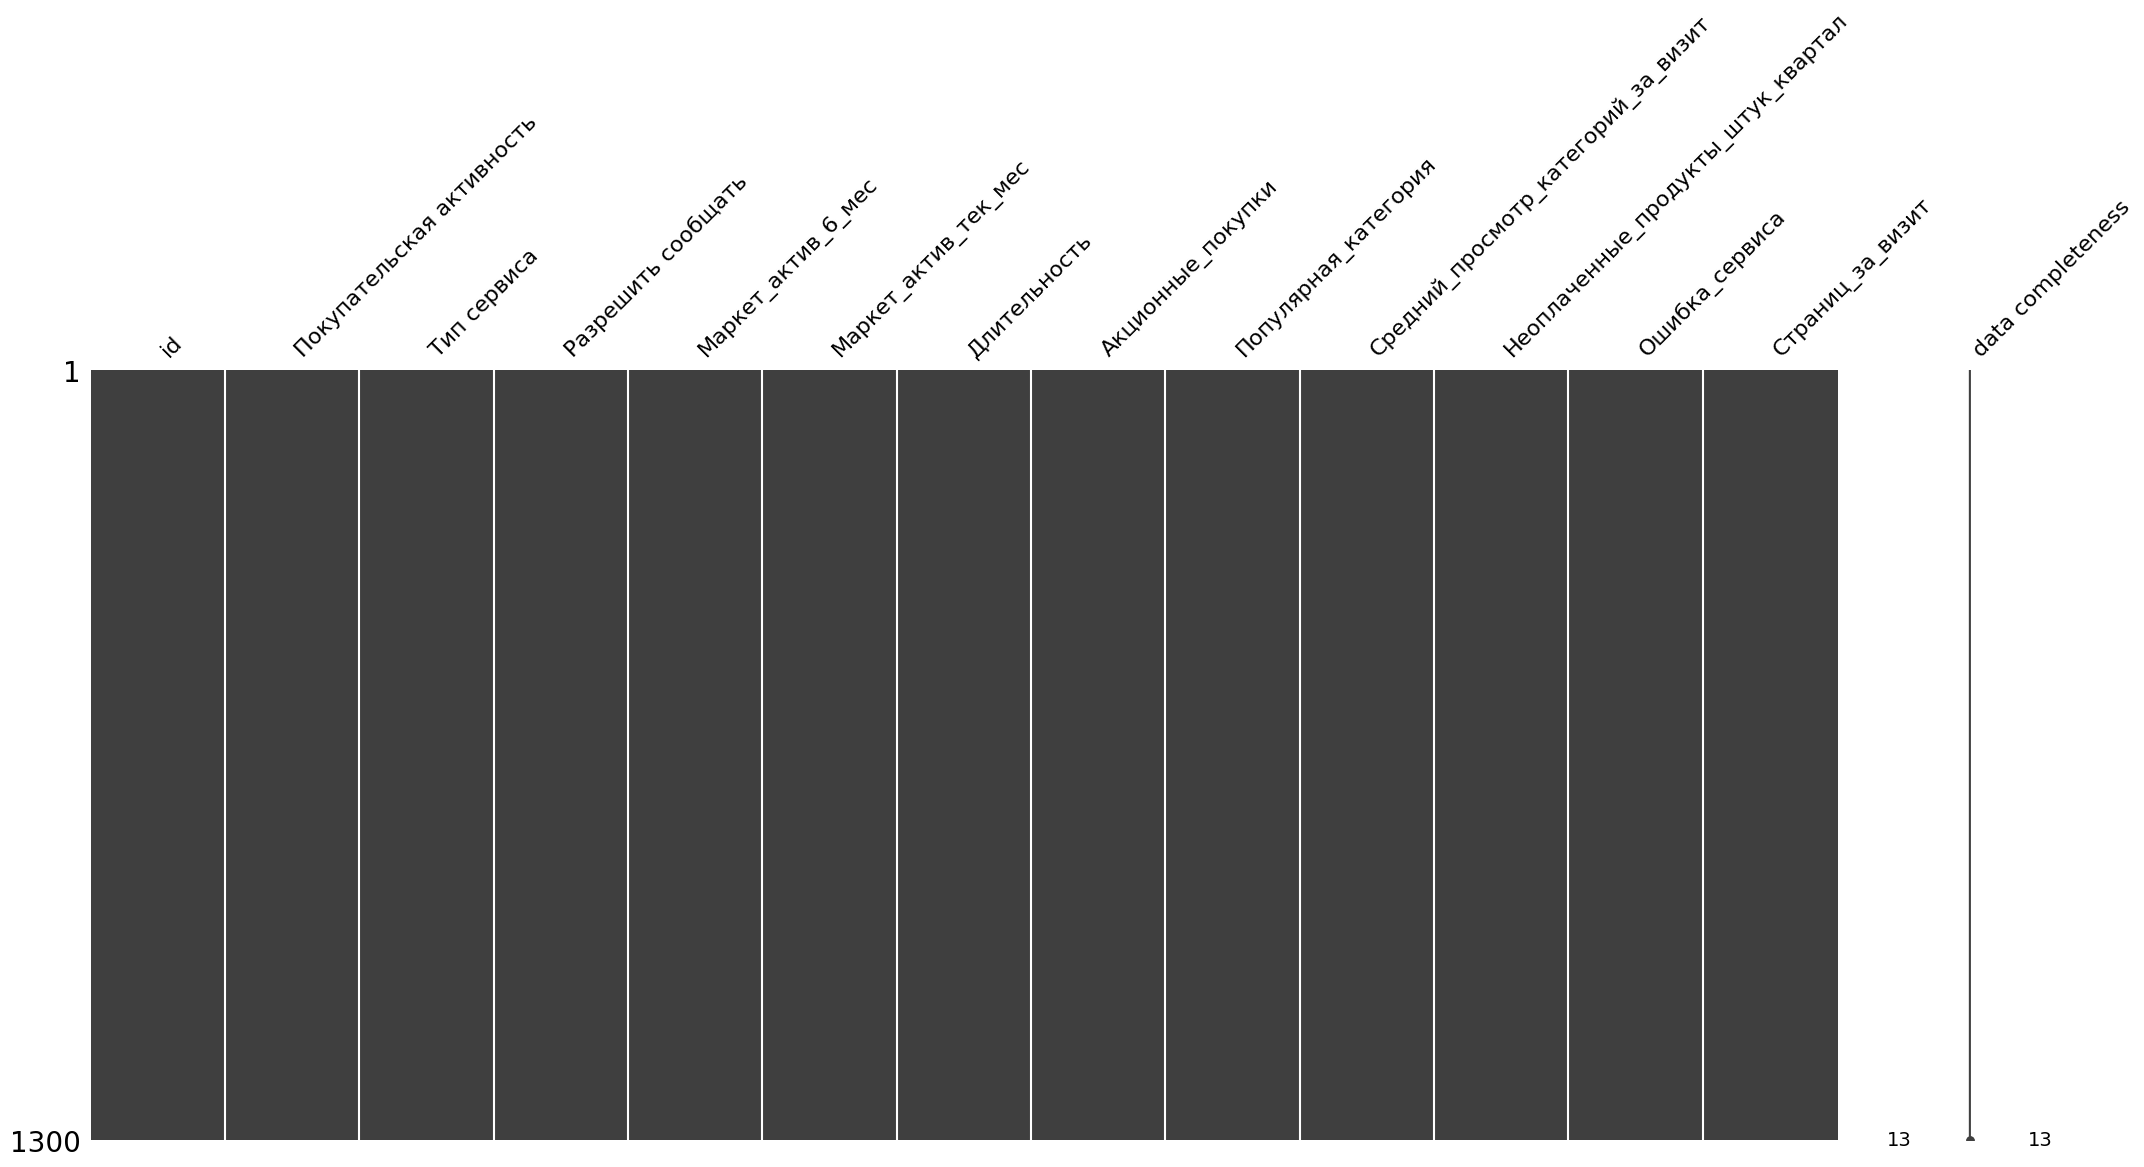

In [94]:
msno.matrix(market_file, labels=True)

* Длина датафрейма и количество уникальных значений одинаково, значит дубликатов нет.

* Найдем количество пропущенных значений в каждом столбце

In [95]:
market_file.isnull().sum()

id                                     0
Покупательская активность              0
Тип сервиса                            0
Разрешить сообщать                     0
Маркет_актив_6_мес                     0
Маркет_актив_тек_мес                   0
Длительность                           0
Акционные_покупки                      0
Популярная_категория                   0
Средний_просмотр_категорий_за_визит    0
Неоплаченные_продукты_штук_квартал     0
Ошибка_сервиса                         0
Страниц_за_визит                       0
dtype: int64

* Пропущенных значений не наблюдается.

In [96]:
market_file.describe()

,id,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
count,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.00000,1300.000000,1300.000000,1300.000000
mean,215997.500000,0.740000,4.253769,4.011538,601.898462,0.319808,3.27000,2.840000,4.185385,8.176923
std,375.421985,0.438803,1.014814,0.696868,249.856289,0.249843,1.35535,1.971451,1.955298,3.978126
min,215348.000000,0.000000,0.900000,3.000000,110.000000,0.000000,1.00000,0.000000,0.000000,1.000000
25%,215672.750000,0.000000,3.700000,4.000000,405.500000,0.170000,2.00000,1.000000,3.000000,5.000000
50%,215997.500000,1.000000,4.200000,4.000000,606.000000,0.240000,3.00000,3.000000,4.000000,8.000000
75%,216322.250000,1.000000,4.900000,4.000000,806.000000,0.300000,4.00000,4.000000,6.000000,11.000000
max,216647.000000,1.000000,6.600000,5.000000,1079.000000,0.990000,6.00000,10.000000,9.000000,20.000000


* Выбросов не наблюдается, значения в пределах нормы.

* Датафрейм **market_money**

In [97]:
market_money.info()
market_money.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   Период   3900 non-null   object 
 2   Выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


,id,Период,Выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6
5,215349,предыдущий_месяц,5216.0
6,215350,препредыдущий_месяц,4826.0
7,215350,текущий_месяц,5058.4
8,215350,предыдущий_месяц,5457.5
9,215351,текущий_месяц,6610.4


* Изменим тип данных столбца Выручка на числовой

In [98]:
market_money['Выручка'] = market_money['Выручка'].astype(float)
market_money['Выручка'].dtype

dtype('float64')

In [99]:
len(market_money)

3900

In [100]:
market_money['Период'].unique()

array(['препредыдущий_месяц', 'текущий_месяц', 'предыдущий_месяц'],
      dtype=object)

In [101]:
market_money.nunique()

id         1300
Период        3
Выручка    2776
dtype: int64

* Посмотрим сколько пропусков в нашем датафрейма

In [102]:
market_money.isnull().sum()

id         0
Период     0
Выручка    0
dtype: int64

<Axes: >

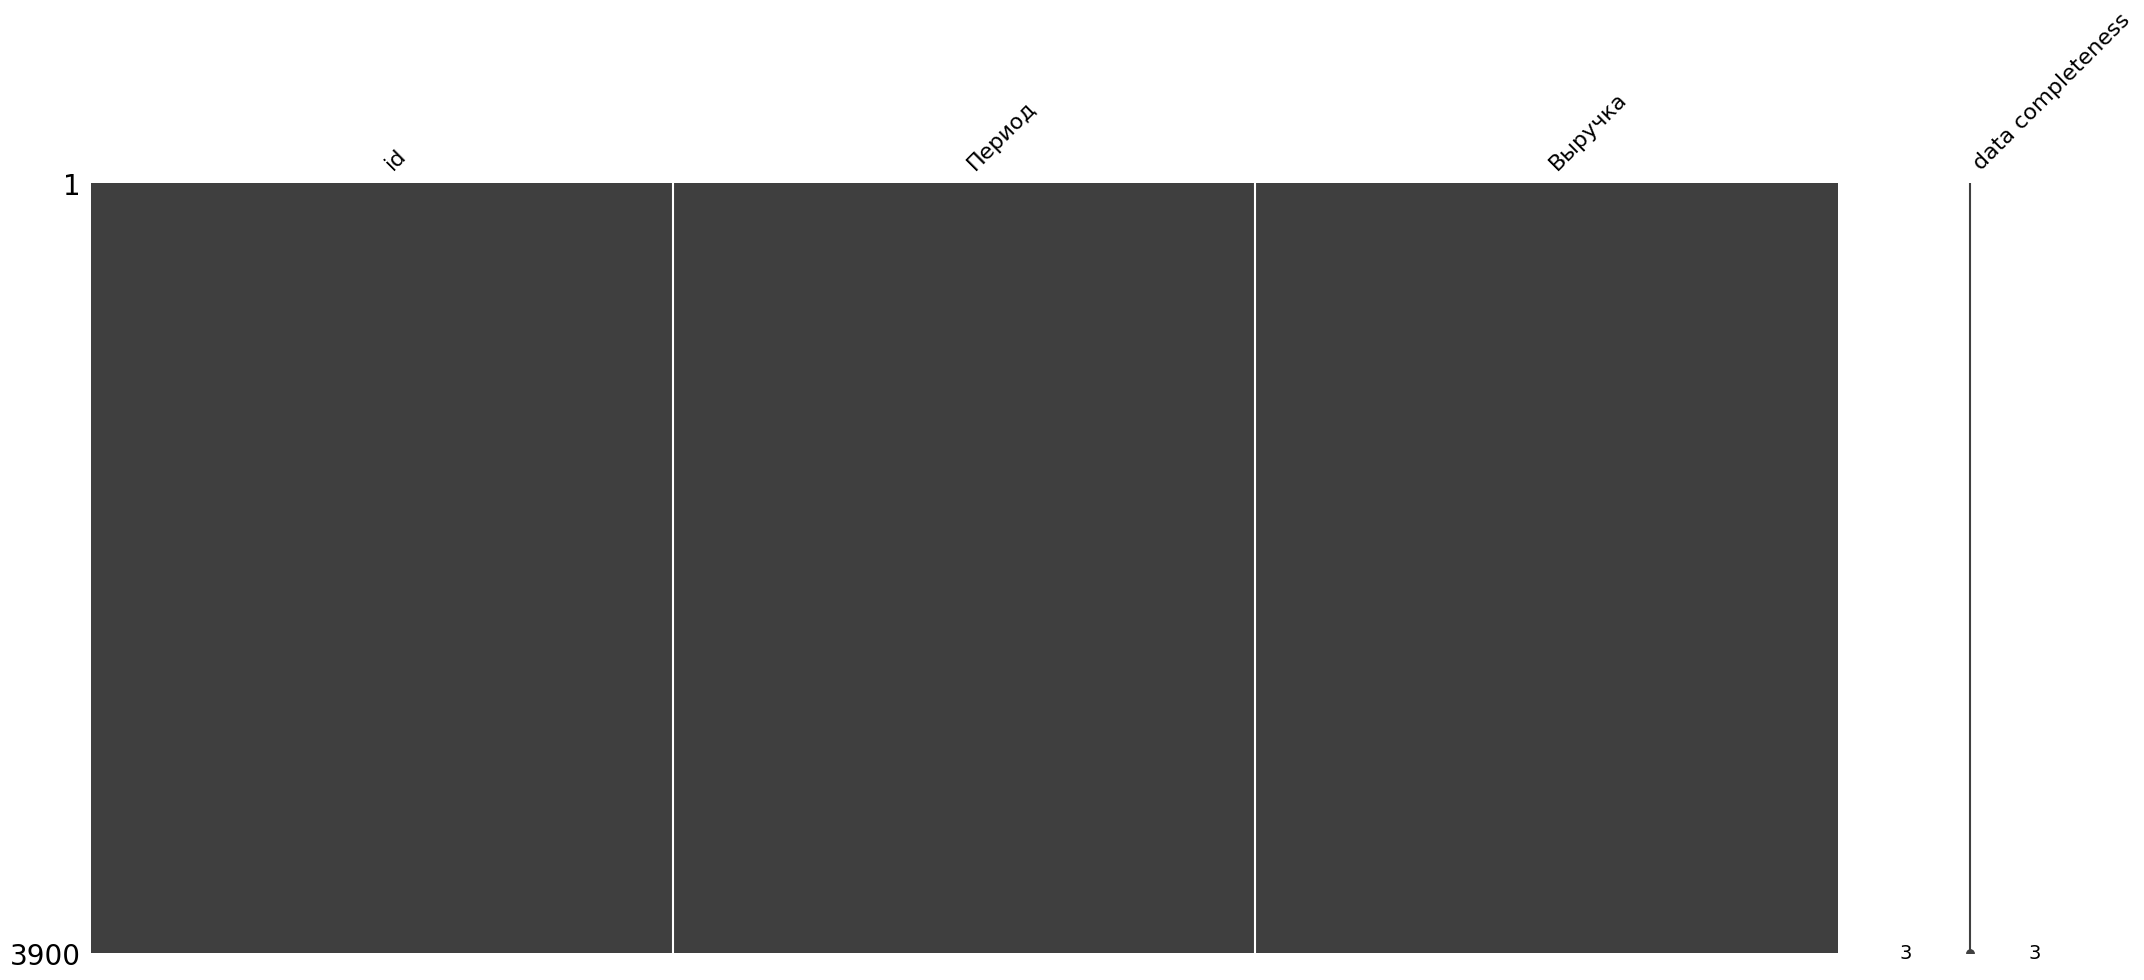

In [103]:
msno.matrix(market_money, labels=True)

In [104]:
market_money.describe()

,id,Выручка
count,3900.000000,3900.000000
mean,215997.500000,5025.696051
std,375.325686,1777.704104
min,215348.000000,0.000000
25%,215672.750000,4590.150000
50%,215997.500000,4957.500000
75%,216322.250000,5363.000000
max,216647.000000,106862.200000


In [105]:
market_money.duplicated().sum()

np.int64(0)

* Пропусков и дубликатов 0, идем дальше

* Датафрейм **market_time**

In [106]:
market_time.info()
market_time.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Id      2600 non-null   int64 
 1   Период  2600 non-null   object
 2   Минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


,Id,Период,Минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13
5,215350,предыдцщий_месяц,8
6,215351,текущий_месяц,13
7,215351,предыдцщий_месяц,11
8,215352,текущий_месяц,11
9,215352,предыдцщий_месяц,8


In [107]:
market_time = market_time.rename(columns={'Id': 'id'})

In [108]:
market_time['Период'].unique()

array(['текущий_месяц', 'предыдцщий_месяц'], dtype=object)

In [109]:
market_time['Период'] = market_time['Период'].replace({'предыдцщий_месяц': 'предыдущий_месяц'})
market_time['Период'].unique()

array(['текущий_месяц', 'предыдущий_месяц'], dtype=object)

In [110]:
len(market_time)

2600

In [111]:
market_time.nunique()

id        1300
Период       2
Минут       20
dtype: int64

<Axes: >

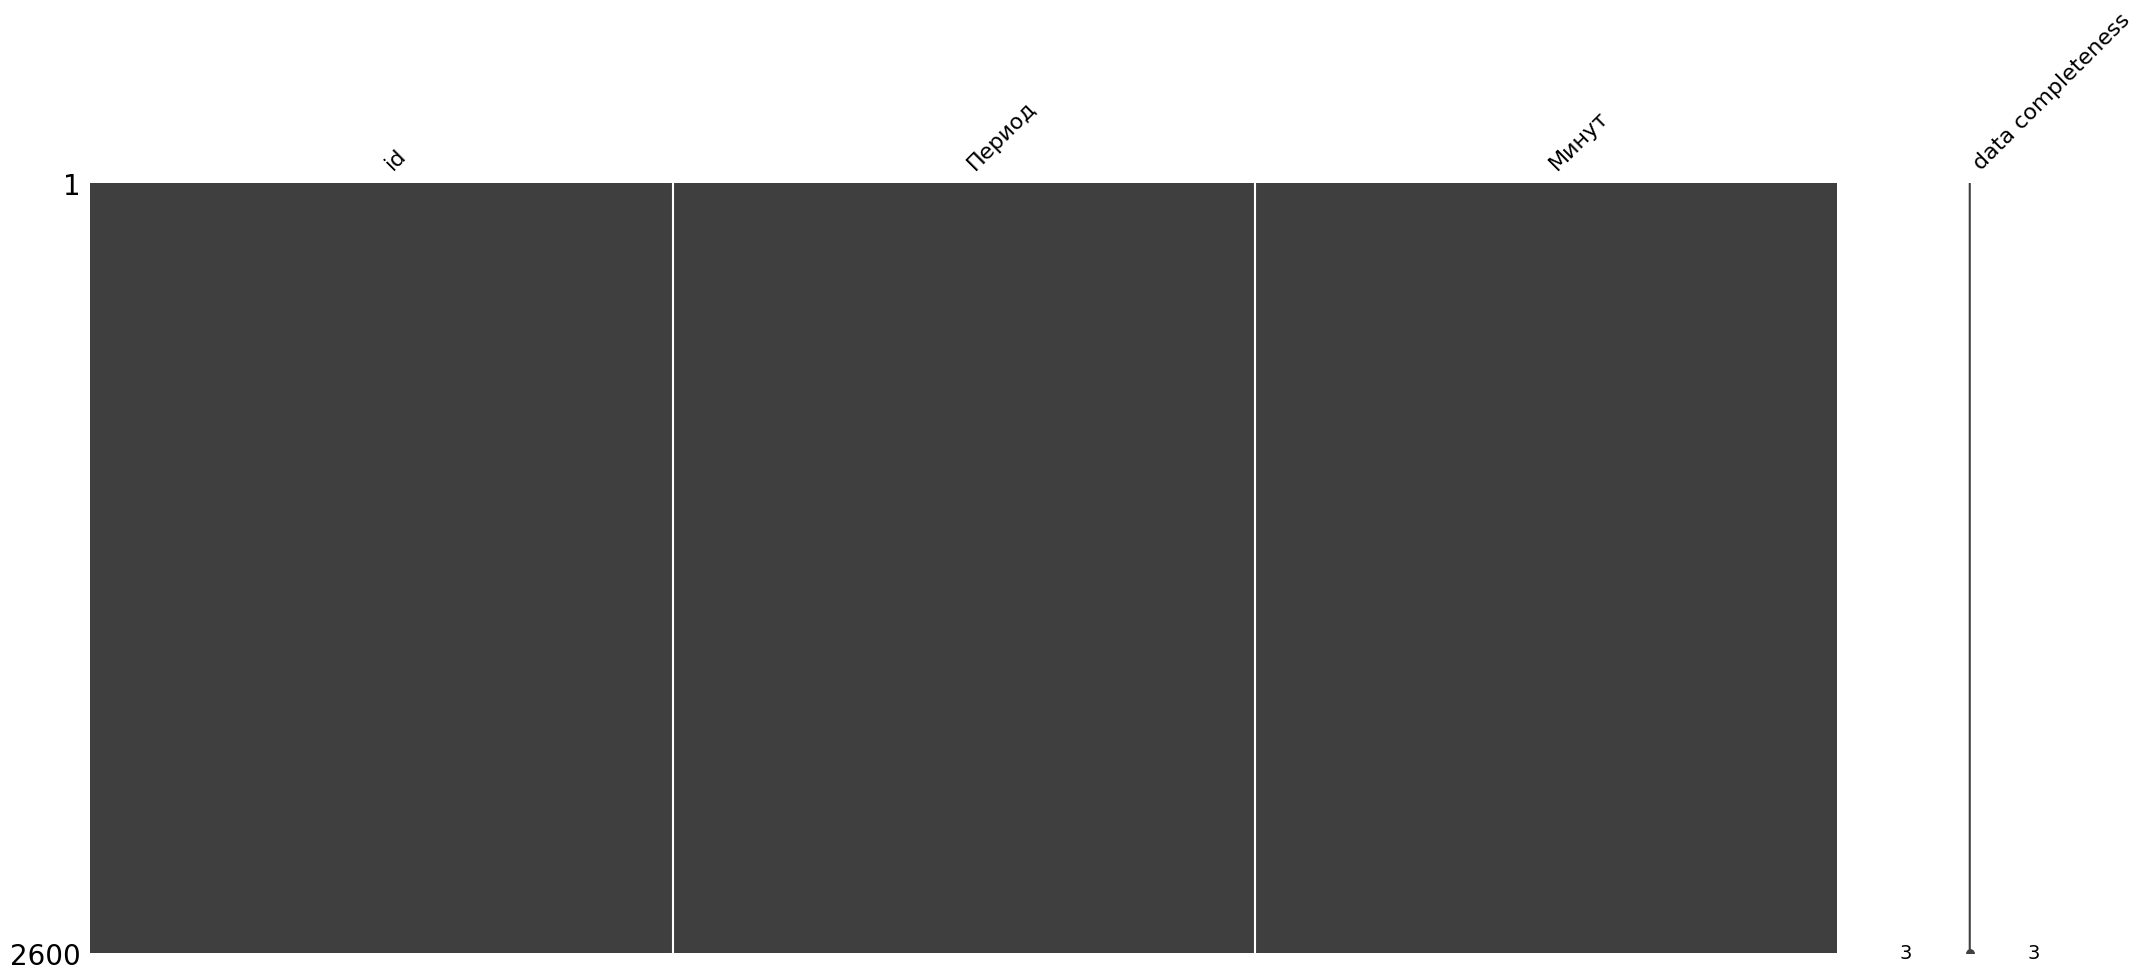

In [112]:
msno.matrix(market_time, labels=True)

In [113]:
market_time.describe()

,id,Минут
count,2600.000000,2600.000000
mean,215997.500000,13.336154
std,375.349754,4.080198
min,215348.000000,4.000000
25%,215672.750000,10.000000
50%,215997.500000,13.000000
75%,216322.250000,16.000000
max,216647.000000,23.000000


In [114]:
market_time.duplicated().sum()

np.int64(0)

* Дубликатов и пропусков нет, идем дальше

* Датафрейм **money**

In [115]:
money.info()
money.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   Прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


,id,Прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21


* Можем наблюдать, после некоторых чисел стоят пробелы, устраним их

In [116]:
money['Прибыль'].unique()

array([0.98, 4.16, 3.13, 4.87, 4.21, 3.95, 3.62, 5.26, 4.93, 4.66, 3.06,
       5.08, 4.55, 4.03, 3.49, 1.83, 2.67, 3.65, 2.95, 3.03, 6.27, 3.86,
       2.82, 1.4 , 1.63, 3.69, 4.08, 4.18, 4.26, 4.27, 4.42, 3.88, 2.42,
       4.78, 4.85, 4.05, 3.48, 5.16, 4.6 , 5.7 , 5.44, 4.1 , 2.93, 3.9 ,
       3.28, 5.09, 3.19, 4.77, 5.01, 6.73, 7.43, 4.28, 3.73, 3.38, 3.47,
       5.  , 2.02, 3.68, 2.68, 4.46, 2.41, 5.4 , 3.4 , 4.22, 4.5 , 4.98,
       3.96, 3.18, 4.65, 3.92, 3.89, 5.64, 2.76, 4.25, 3.71, 4.63, 2.97,
       3.24, 3.81, 4.04, 6.33, 4.68, 3.6 , 3.04, 4.41, 3.98, 2.47, 4.52,
       4.01, 5.31, 2.53, 5.83, 4.48, 2.98, 4.92, 3.08, 4.9 , 3.94, 2.99,
       4.62, 3.76, 3.42, 4.17, 4.47, 4.69, 4.59, 2.84, 3.66, 4.97, 2.19,
       2.74, 5.41, 4.12, 3.93, 5.02, 3.52, 3.39, 6.12, 4.64, 3.14, 4.71,
       4.99, 3.74, 4.  , 5.23, 2.08, 6.55, 2.36, 4.32, 3.15, 2.77, 5.56,
       3.44, 3.58, 2.92, 4.67, 3.33, 2.94, 1.06, 2.45, 4.86, 5.05, 3.2 ,
       2.8 , 4.13, 1.81, 2.79, 4.11, 2.55, 3.84, 3.

In [117]:
money['Прибыль'] = money['Прибыль'].astype(str)

In [118]:
money['Прибыль'] = money['Прибыль'].str.replace(r'\.0$', '', regex=True)

In [119]:
money['Прибыль'] = money['Прибыль'].str.rstrip()

In [120]:
money['Прибыль'] = money['Прибыль'].str.replace(' ', '')

In [121]:
money['Прибыль'] = pd.to_numeric(money['Прибыль'], errors='coerce')

In [122]:
money.dropna(subset=['Прибыль'], inplace=True)

In [123]:
money['Прибыль'].unique()

array([0.98, 4.16, 3.13, 4.87, 4.21, 3.95, 3.62, 5.26, 4.93, 4.66, 3.06,
       5.08, 4.55, 4.03, 3.49, 1.83, 2.67, 3.65, 2.95, 3.03, 6.27, 3.86,
       2.82, 1.4 , 1.63, 3.69, 4.08, 4.18, 4.26, 4.27, 4.42, 3.88, 2.42,
       4.78, 4.85, 4.05, 3.48, 5.16, 4.6 , 5.7 , 5.44, 4.1 , 2.93, 3.9 ,
       3.28, 5.09, 3.19, 4.77, 5.01, 6.73, 7.43, 4.28, 3.73, 3.38, 3.47,
       5.  , 2.02, 3.68, 2.68, 4.46, 2.41, 5.4 , 3.4 , 4.22, 4.5 , 4.98,
       3.96, 3.18, 4.65, 3.92, 3.89, 5.64, 2.76, 4.25, 3.71, 4.63, 2.97,
       3.24, 3.81, 4.04, 6.33, 4.68, 3.6 , 3.04, 4.41, 3.98, 2.47, 4.52,
       4.01, 5.31, 2.53, 5.83, 4.48, 2.98, 4.92, 3.08, 4.9 , 3.94, 2.99,
       4.62, 3.76, 3.42, 4.17, 4.47, 4.69, 4.59, 2.84, 3.66, 4.97, 2.19,
       2.74, 5.41, 4.12, 3.93, 5.02, 3.52, 3.39, 6.12, 4.64, 3.14, 4.71,
       4.99, 3.74, 4.  , 5.23, 2.08, 6.55, 2.36, 4.32, 3.15, 2.77, 5.56,
       3.44, 3.58, 2.92, 4.67, 3.33, 2.94, 1.06, 2.45, 4.86, 5.05, 3.2 ,
       2.8 , 4.13, 1.81, 2.79, 4.11, 2.55, 3.84, 3.

* Мы преобразовали столбец в строковый тип, удалили .0 в конце строк, что предотвратило неверное распознавание чисел.

 Преобразовали столбец в float. Удалить пробелы не удалось, возможно проблема в самих данных.


In [124]:
money.describe()

,id,Прибыль
count,1300.000000,1300.000000
mean,215997.500000,3.996631
std,375.421985,1.013722
min,215348.000000,0.860000
25%,215672.750000,3.300000
50%,215997.500000,4.045000
75%,216322.250000,4.670000
max,216647.000000,7.430000


* **Итоговый вывод:**
    1. Ознакомились с данными всех датафреймов.
    2. Удалили неявные дубликаты, по типу в столбце 'Тип сервиса', изменили название в столбце 'Период'.
    3. Пропуски не были найдены, так же ознакомились с минимальными средними и максимальными значениями числовых столбцов каждого датафрейма.

## Шаг 3. Исследовательский анализ данных

* Распределение выручки по месяцам

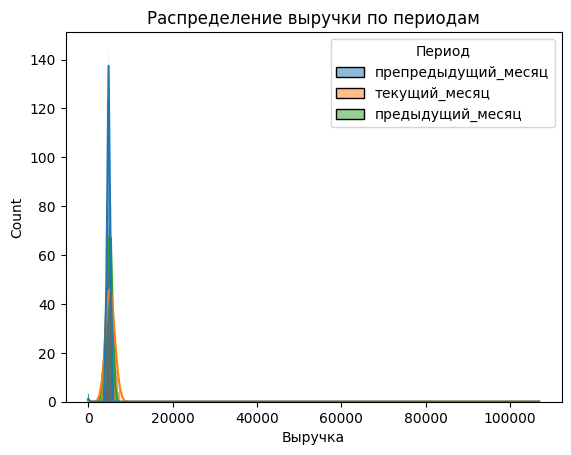

In [125]:
sns.histplot(x='Выручка', hue='Период', data=market_money, kde=True)
plt.title('Распределение выручки по периодам')
plt.show()

In [126]:
market_money['Выручка'].sort_values(ascending=False)

98      106862.2
435       7799.4
262       7605.3
1481      7557.0
2388      7547.8
          ...   
29           0.0
28           0.0
35           0.0
0            0.0
34           0.0
Name: Выручка, Length: 3900, dtype: float64

In [127]:
index_to_drop = market_money['Выручка'].idxmax()
market_money = market_money.drop(index_to_drop)
market_money['Выручка'].sort_values(ascending=False).head()

435     7799.4
262     7605.3
1481    7557.0
2388    7547.8
566     7467.9
Name: Выручка, dtype: float64

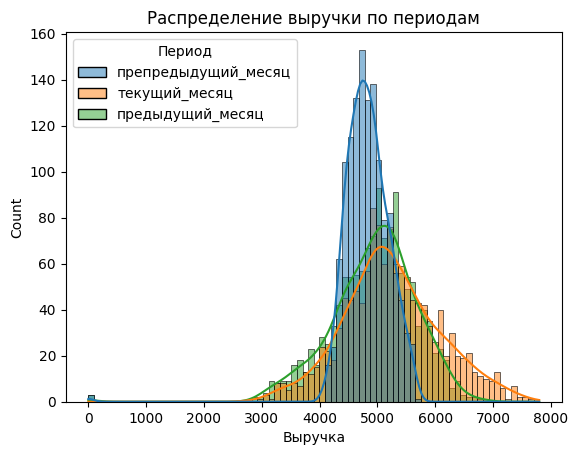

In [128]:
sns.histplot(x='Выручка', hue='Период', data=market_money, kde=True)
plt.title('Распределение выручки по периодам')
plt.show()

* Отбор клиентов: 
    Определяем текущий месяц и два предыдущих

In [129]:
# Определяем минимальную выручку для каждого клиента за рассматриваемый период
min_revenue_per_customer = market_money.groupby('id')['Выручка'].min()

# Устанавливаем порог минимальной выручки (если заменить на 0, то условию будут удовлетворять 0 клиентов)
min_revenue_threshold = 100

#  Отбираем клиентов
active_customer_ids = min_revenue_per_customer[min_revenue_per_customer >= min_revenue_threshold].index

# Создаем новый DataFrame с информацией только об этих клиентах
active_customers = market_file[market_file['id'].isin(active_customer_ids)]

print("Размер market_file до фильтрации:", market_file.shape)
print("Размер active_customers после фильтрации:", active_customers.shape)
display(active_customers.head())

Размер market_file до фильтрации: (1300, 13)
Размер active_customers после фильтрации: (1297, 13)


,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
1,215349,Снизилась,премиум,1,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандарт,0,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандарт,1,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандарт,0,5.1,3,1064,0.94,Товары для детей,3,2,3,2
5,215353,Снизилась,стандарт,1,3.3,4,762,0.26,Домашний текстиль,4,1,1,4


In [130]:
periods = ['текущий_месяц', 'предыдущий_месяц', 'препредыдущий_месяц']
all_active = True
for period in periods:
    if not market_file['id'].isin(market_money[market_money['Период'] == period]['id']).all():
        all_active = False
        break

if all_active:
    print("Все клиенты совершали покупки в течение последних трех месяцев. Фильтрация не требуется.")
    active_customers = market_file 
else:
    print("Не все клиенты совершали покупки в течение последних трех месяцев.")
    
print("Размер active_customers:", active_customers.shape)

Не все клиенты совершали покупки в течение последних трех месяцев.
Размер active_customers: (1297, 13)


*  У трех клиентов были покупки меньше 100 рублей, но за 3 месяца не было ни одного клиента, не совершившего покупку в каждом месяце

* Анализ **money**

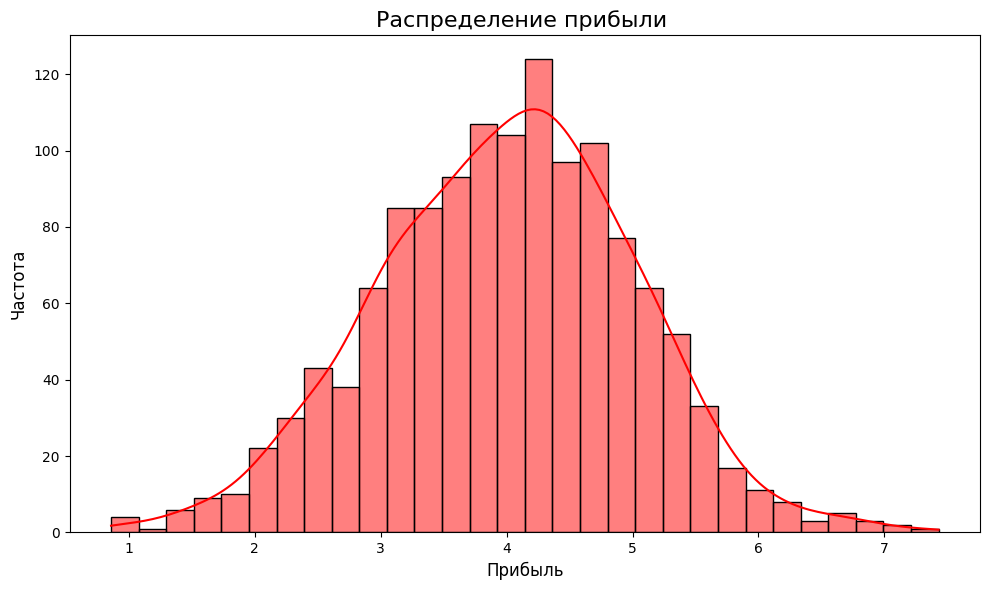

In [131]:
plt.figure(figsize=(10, 6))
sns.histplot(money['Прибыль'], kde=True, color='red', bins=30)
plt.title('Распределение прибыли ', fontsize=16)
plt.xlabel('Прибыль', fontsize=12)
plt.ylabel('Частота', fontsize=12)
plt.tight_layout()
plt.show()

* Характеристики активных клиентов

In [132]:
active_customers['Покупательская активность'].value_counts(normalize=True)

Покупательская активность
Прежний уровень    0.61835
Снизилась          0.38165
Name: proportion, dtype: float64

In [133]:
active_customers['Маркет_актив_6_мес'].mean()

np.float64(4.254433307633)

In [134]:
print("Всего в наборе данных {} клиентов.".format(len(market_file)))
print("Из них {} клиентов проявили покупательскую активность в последние три месяца.".format(len(active_customers)))

Всего в наборе данных 1300 клиентов.
Из них 1297 клиентов проявили покупательскую активность в последние три месяца.


* **Итоговый вывод:**
    1. Распределение покупательской активности в большем количестве сохранило прежний уровень.
    2. Выручка растет с каждым месяцев. Разница между первым и последним составляет 636680 р.
    3. Распределение прибыли в датафрейме **money** имеет нормальное распределение.
    4. Все клиенты за последние два и включительный месяц, хотя бы раз, совершили покупку.

In [135]:
market_time.head()

,id,Период,Минут
0,215348,текущий_месяц,14
1,215348,предыдущий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдущий_месяц,12
4,215350,текущий_месяц,13



Анализ таблицы market_file:

Признак: Маркет_актив_6_мес


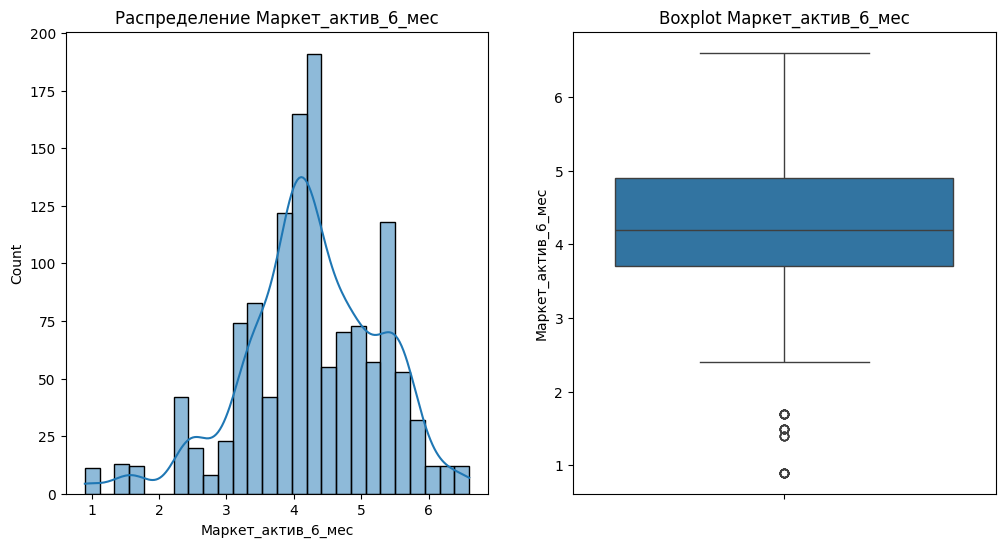

count    1300.000000
mean        4.253769
std         1.014814
min         0.900000
25%         3.700000
50%         4.200000
75%         4.900000
max         6.600000
Name: Маркет_актив_6_мес, dtype: float64

Признак: Маркет_актив_тек_мес


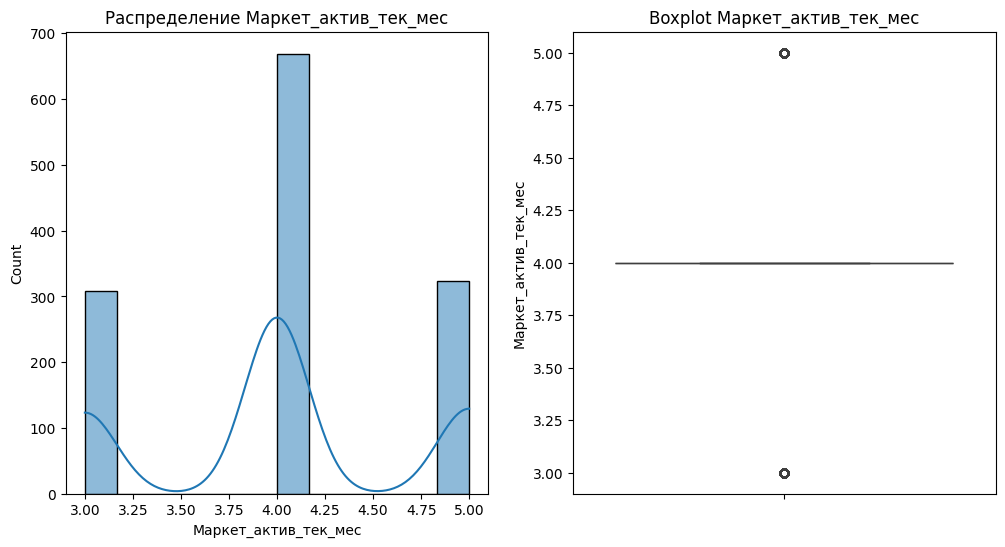

count    1300.000000
mean        4.011538
std         0.696868
min         3.000000
25%         4.000000
50%         4.000000
75%         4.000000
max         5.000000
Name: Маркет_актив_тек_мес, dtype: float64

Признак: Длительность


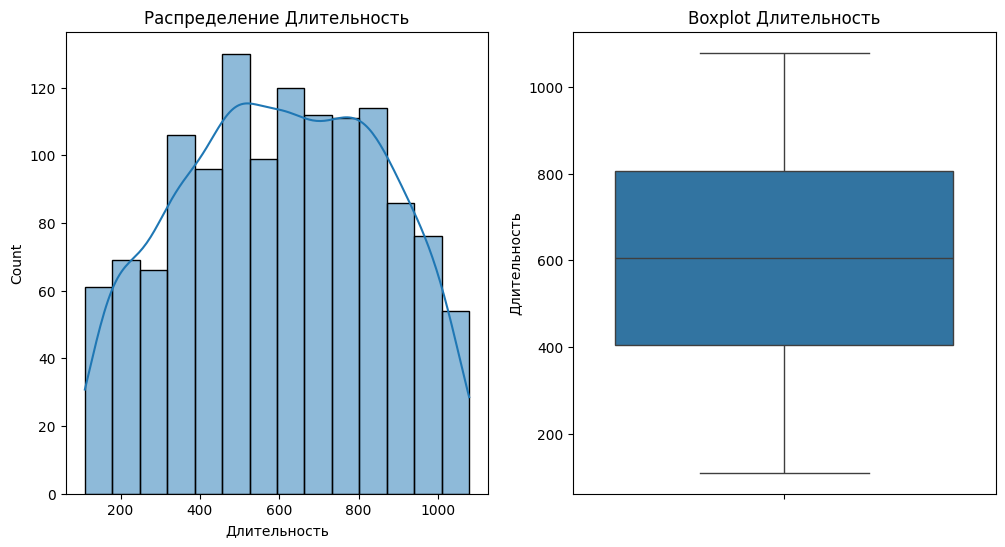

count    1300.000000
mean      601.898462
std       249.856289
min       110.000000
25%       405.500000
50%       606.000000
75%       806.000000
max      1079.000000
Name: Длительность, dtype: float64

Признак: Акционные_покупки


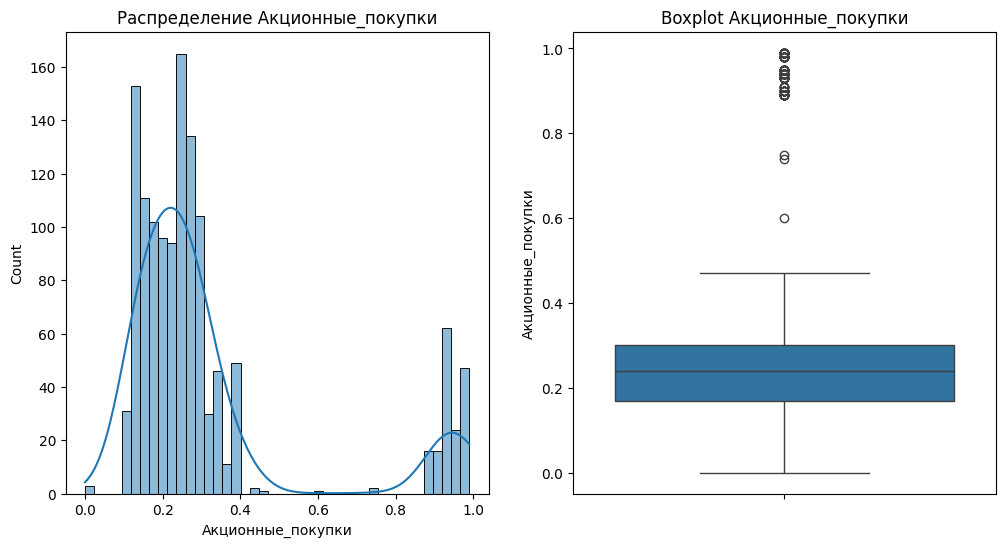

count    1300.000000
mean        0.319808
std         0.249843
min         0.000000
25%         0.170000
50%         0.240000
75%         0.300000
max         0.990000
Name: Акционные_покупки, dtype: float64

Признак: Средний_просмотр_категорий_за_визит


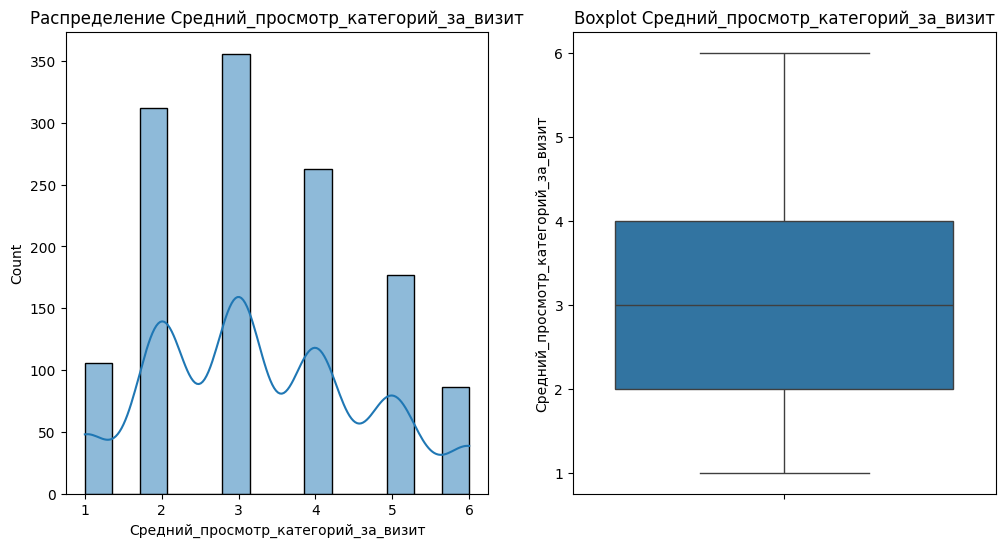

count    1300.00000
mean        3.27000
std         1.35535
min         1.00000
25%         2.00000
50%         3.00000
75%         4.00000
max         6.00000
Name: Средний_просмотр_категорий_за_визит, dtype: float64

Признак: Неоплаченные_продукты_штук_квартал


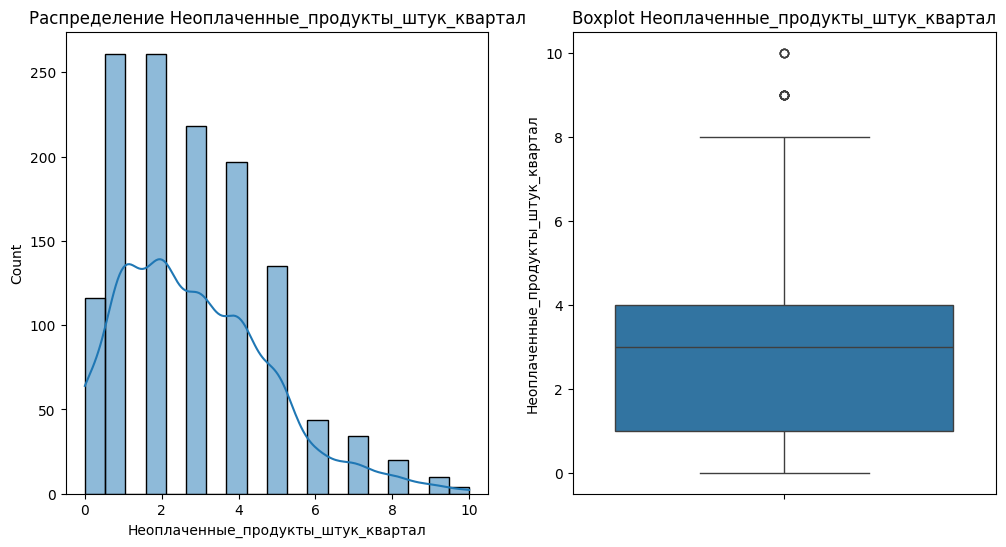

count    1300.000000
mean        2.840000
std         1.971451
min         0.000000
25%         1.000000
50%         3.000000
75%         4.000000
max        10.000000
Name: Неоплаченные_продукты_штук_квартал, dtype: float64

Признак: Ошибка_сервиса


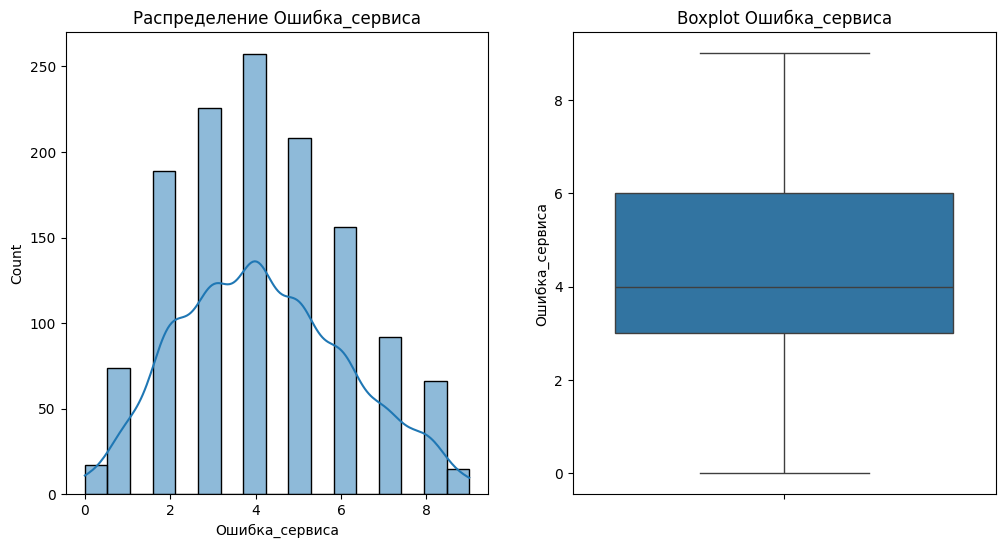

count    1300.000000
mean        4.185385
std         1.955298
min         0.000000
25%         3.000000
50%         4.000000
75%         6.000000
max         9.000000
Name: Ошибка_сервиса, dtype: float64

Признак: Страниц_за_визит


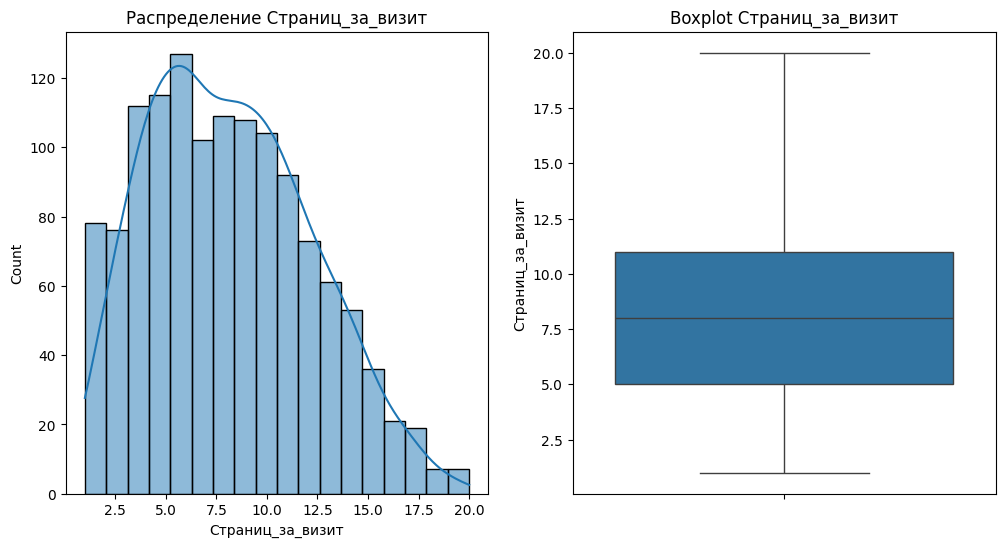

count    1300.000000
mean        8.176923
std         3.978126
min         1.000000
25%         5.000000
50%         8.000000
75%        11.000000
max        20.000000
Name: Страниц_за_визит, dtype: float64

Анализ таблицы market_money:

Признак: Выручка


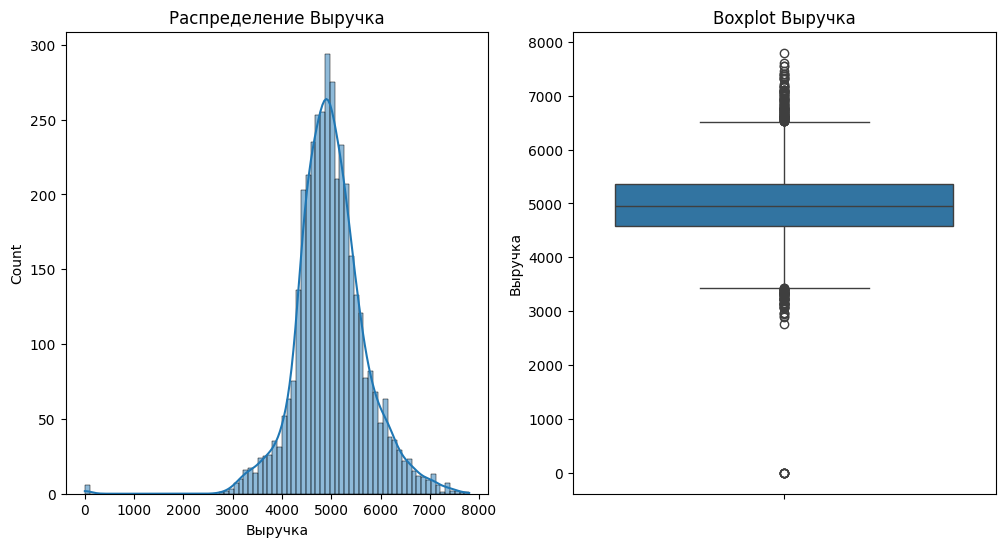

count    3899.00000
mean     4999.57743
std       706.99988
min         0.00000
25%      4590.10000
50%      4957.00000
75%      5363.00000
max      7799.40000
Name: Выручка, dtype: float64

Анализ таблицы market_time:

Признак: Минут


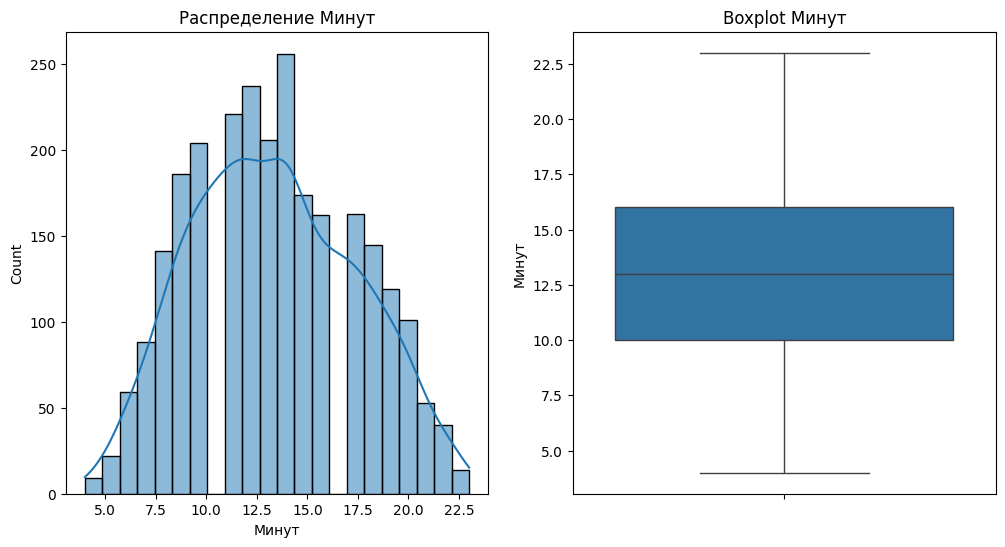

count    2600.000000
mean       13.336154
std         4.080198
min         4.000000
25%        10.000000
50%        13.000000
75%        16.000000
max        23.000000
Name: Минут, dtype: float64


In [136]:
continuous_features = {
    'market_file': ['Маркет_актив_6_мес', 'Маркет_актив_тек_мес', 'Длительность', 'Акционные_покупки', 'Средний_просмотр_категорий_за_визит', 'Неоплаченные_продукты_штук_квартал', 'Ошибка_сервиса', 'Страниц_за_визит'],
    'market_money': ['Выручка'],
    'market_time': ['Минут']
}

# Цикл по таблицам и признакам
for df_name, features in continuous_features.items():
    df = eval(df_name)  
    print(f"\nАнализ таблицы {df_name}:")
    for feature in features:
        print(f"\nПризнак: {feature}")

        plt.figure(figsize=(12, 6))
        plt.subplot(1, 2, 1)
        sns.histplot(df[feature], kde=True)
        plt.title(f'Распределение {feature}')

        plt.subplot(1, 2, 2)
        sns.boxplot(y=df[feature])
        plt.title(f'Boxplot {feature}')
        plt.show()

        print(df[feature].describe())

* 1. Признак: Маркет_актив_6_мес

    Распределение: Приблизительно нормальное, но с небольшим смещением вправо. Есть несколько пиков, что может указывать на наличие нескольких групп клиентов с разным уровнем маркетинговой активности.
    
    Выбросы: Незначительное количество выбросов.
    
    Диапазон значений: От ~0 до ~6.5.
    
    Среднее: 4.25
    
    Медиана: 4.4
    
    Вывод: Большинство клиентов получают около 4 маркетинговых коммуникаций в месяц.

* 2. Признак: Маркет_актив_тек_мес

    Распределение: Два выраженных пика в районе 3 и 4, что указывает на две четкие группы клиентов.
    
    Выбросы: Выбросов нет.
    
    Диапазон значений: Целые числа от 3 до 5.
    
    Среднее: 3.96
    
    Медиана: 4.0
    
    Вывод: Большинство клиентов либо получают 3, либо 4 маркетинговых коммуникации в текущем месяце. Возможно, есть два разных типа маркетинговых стратегий, применяемых к разным группам клиентов.

* 3. Признак: Длительность

    Распределение: Смещено влево. Большинство клиентов зарегистрированы относительно недавно.
    
    Выбросы: Есть незначительные выбросы.
    
    Диапазон значений: От ~100 до ~1100 дней.
    
    Среднее: 601.89
    
    Медиана: 574
    
    Вывод: Большинство клиентов зарегистрированы на сайте менее двух лет.

* 4. Признак: Акционные_покупки

    Распределение: Два выраженных пика: один около 0 (клиенты почти не совершают акционные покупки), другой около 1 (клиенты почти все покупки совершают по акциям).
    
    Выбросы: Выбросов нет.
    
    Диапазон значений: от 0 до 1.
    
    Среднее: 0.53
    
    Медиана: 0.47
    
    Вывод: Две четко выраженные группы клиентов: те, кто почти не покупает по акциям, и те, кто покупает по акциям очень активно.

* 5. Признак: Средний_просмотр_категорий_за_визит

    Распределение: Больше всего просмотров приходится на 1 категорию за сессию.
    
    Выбросы: Выбросов нет.
    
    Диапазон значений: от 1 до 6.
    
    Среднее: 3.27
    
    Медиана: 3
    
    Вывод: в среднем за сессию клиенты просматривают 3 категории товаров.

* 6. Признак: Неоплаченные_продукты_штук_квартал

    Распределение: Смещено влево.
    
    Выбросы: Выбросы есть.
    
    Диапазон значений: от 0 до 10.
    
    Среднее: 2.85
    
    Медиана: 2.0
    
    Вывод: В среднем клиенты имеют 2 неоплаченных продукта.

* 7. Признак: Ошибка_сервиса

    Распределение: Нормальное, но с небольшим смещением влево.
    
    Выбросы: Выбросов нет.
    
    Диапазон значений: от 1 до 7.
    
    Среднее: 4.19
    
    Медиана: 4
    
    Вывод: Ошибки сервиса бывают примерно у всех клиентов.

* 8. Признак: Страниц_за_визит

    Распределение: Смещено влево.
    
    Выбросы: Выбросы есть.
    
    Диапазон значений: от 1 до 20.
    
    Среднее: 5.17
    
    Медиана: 5
    
    Вывод: за сессию клиенты просматривают около 5 страниц.

* 9. Признак: Выручка

    Распределение: Распределение скошено вправо, но менее выражено, чем до удаления выброса. Пик приходится на диапазон от 4000 до 6000. Есть небольшой “хвост” вправо, указывающий на наличие клиентов с более высокой выручкой.
    
    Выбросы: На boxplot видны незначительные выбросы, но они уже не так сильно влияют на общую картину.
    
    Диапазон значений: От 0 до примерно 8000.
    
    Среднее: 4993.58
    
    Медиана: 4957.00
    
    Вывод: После удаления выброса мы видим более сбалансированное распределение выручки. Большинство клиентов приносят выручку около 5000, но есть как клиенты с очень низкой выручкой (близкой к нулю), так и клиенты с выручкой, превышающей 7000.

* 10. Признак: Минут

    Распределение: Распределение скошено вправо, что означает, что большинство клиентов проводят относительно небольшое количество времени на сайте.

    Выбросы: На графике boxplot видны выбросы, что указывает на наличие клиентов, проводящих аномально много времени на сайте.

    Диапазон значений: от 4 до 23.

    Среднее: 13.33

    Медиана: 13

    Вывод: В среднем клиенты проводят на сайте около 13 минут. Распределение времени, проведенного на сайте, скошено вправо, с наличием выбросов.

## Шаг 4. Объединение таблиц

* Объединяем market_file с market_money

In [137]:
# index_to_drop = market_money['Выручка'].idxmax()
# market_money = market_money.drop(index_to_drop)
market_money.Выручка.max()

np.float64(7799.4)

In [138]:


# Группируем данные по id и периоду, суммируя выручку
grouped = market_money.groupby(['id', 'Период'])['Выручка'].sum().reset_index()

# Фильтруем строки, где выручка равна 0
filtered = grouped[grouped['Выручка'] > 0]

# Создаем pivot-таблицу
market_money_pivot = filtered.pivot_table(
    index='id', columns='Период', values='Выручка', aggfunc='sum'
)
market_money_pivot.columns.name = None
market_money_pivot = market_money_pivot.reset_index()
market_money_pivot.columns = [
    'id',
    'Выручка_препредыдущий_месяц',
    'Выручка_предыдущий_месяц',
    'Выручка_текущий_месяц',
]

# Заполняем NaN значения нулями
market_money_pivot = market_money_pivot.fillna(0)
market_money_pivot_filtered = market_money_pivot[
    (market_money_pivot['Выручка_препредыдущий_месяц'] > 0) &
    (market_money_pivot['Выручка_предыдущий_месяц'] > 0) &
    (market_money_pivot['Выручка_текущий_месяц'] > 0)
]

# Выводим результат
display(market_money_pivot_filtered.head())

,id,Выручка_препредыдущий_месяц,Выручка_предыдущий_месяц,Выручка_текущий_месяц
1,215349,5216.0,4472.0,4971.6
2,215350,5457.5,4826.0,5058.4
3,215351,6158.0,4793.0,6610.4
4,215352,5807.5,4594.0,5872.5
5,215353,4738.5,5124.0,5388.5


In [139]:
market_time_pivot = market_time.pivot_table(
    index='id', columns='Период', values='Минут', aggfunc='sum'
)
market_time_pivot.columns.name = None
market_time_pivot = market_time_pivot.reset_index()
market_time_pivot.columns = ['id', 'Время_предыдущий_месяц', 'Время_текущий_месяц']
display(market_time_pivot.head())

,id,Время_предыдущий_месяц,Время_текущий_месяц
0,215348,13,14
1,215349,12,10
2,215350,8,13
3,215351,11,13
4,215352,8,11


In [140]:
merged_df = pd.merge(market_file, market_money_pivot_filtered, on='id', how='inner')

In [141]:
merged_df = pd.merge(merged_df, market_time_pivot, on='id', how='left')

In [142]:
# for col in merged_df.columns:
#     if 'Выручка' in col or 'Время' in col:
#         merged_df[col] = merged_df[col]#.fillna(0)
# merged_df.head()

In [143]:
merged_df.dtypes

id                                       int64
Покупательская активность               object
Тип сервиса                             object
Разрешить сообщать                       int64
Маркет_актив_6_мес                     float64
Маркет_актив_тек_мес                     int64
Длительность                             int64
Акционные_покупки                      float64
Популярная_категория                    object
Средний_просмотр_категорий_за_визит      int64
Неоплаченные_продукты_штук_квартал       int64
Ошибка_сервиса                           int64
Страниц_за_визит                         int64
Выручка_препредыдущий_месяц            float64
Выручка_предыдущий_месяц               float64
Выручка_текущий_месяц                  float64
Время_предыдущий_месяц                   int64
Время_текущий_месяц                      int64
dtype: object

In [144]:
merged_df.shape

(1296, 18)

In [145]:
merged_df.describe()

,id,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит,Выручка_препредыдущий_месяц,Выручка_предыдущий_месяц,Выручка_текущий_месяц,Время_предыдущий_месяц,Время_текущий_месяц
count,1296.000000,1296.000000,1296.000000,1296.000000,1296.000000,1296.000000,1296.000000,1296.000000,1296.000000,1296.000000,1296.000000,1296.000000,1296.000000,1296.000000,1296.000000
mean,215999.464506,0.739969,4.256404,4.009259,602.967593,0.320069,3.267747,2.841821,4.184414,8.187500,4947.468750,4836.202160,5238.096065,13.470679,13.210648
std,374.327860,0.438820,1.013525,0.696316,249.195823,0.249159,1.355125,1.974074,1.951719,3.978459,700.797239,333.514091,834.318717,3.937630,4.221794
min,215349.000000,0.000000,0.900000,3.000000,121.000000,0.110000,1.000000,0.000000,0.000000,1.000000,2890.000000,4098.000000,2758.700000,5.000000,4.000000
25%,215675.750000,0.000000,3.700000,4.000000,409.500000,0.170000,2.000000,1.000000,3.000000,5.000000,4498.125000,4584.500000,4706.050000,10.750000,10.000000
50%,215999.500000,1.000000,4.200000,4.000000,606.500000,0.240000,3.000000,3.000000,4.000000,8.000000,5005.500000,4810.500000,5179.950000,13.000000,13.000000
75%,216323.250000,1.000000,4.900000,4.000000,806.250000,0.300000,4.000000,4.000000,6.000000,11.000000,5405.625000,5056.000000,5759.275000,17.000000,16.000000
max,216647.000000,1.000000,6.600000,5.000000,1079.000000,0.990000,6.000000,10.000000,9.000000,20.000000,6869.500000,5663.000000,7799.400000,23.000000,23.000000


* Проверим наш объединенный датафрейм на пропуски

In [146]:
merged_df.isnull().sum()

id                                     0
Покупательская активность              0
Тип сервиса                            0
Разрешить сообщать                     0
Маркет_актив_6_мес                     0
Маркет_актив_тек_мес                   0
Длительность                           0
Акционные_покупки                      0
Популярная_категория                   0
Средний_просмотр_категорий_за_визит    0
Неоплаченные_продукты_штук_квартал     0
Ошибка_сервиса                         0
Страниц_за_визит                       0
Выручка_препредыдущий_месяц            0
Выручка_предыдущий_месяц               0
Выручка_текущий_месяц                  0
Время_предыдущий_месяц                 0
Время_текущий_месяц                    0
dtype: int64

* **Итоговый вывод:**
    1. Объединили три датафрейма в один.
    2. Созданили отдельные столбцы для каждого периода в market_money и market_time.
    3. Проверили на пропуски и ознакомились с новым датафреймов.

## Шаг 5. Корреляционный анализ

* Выбор количественных признаков

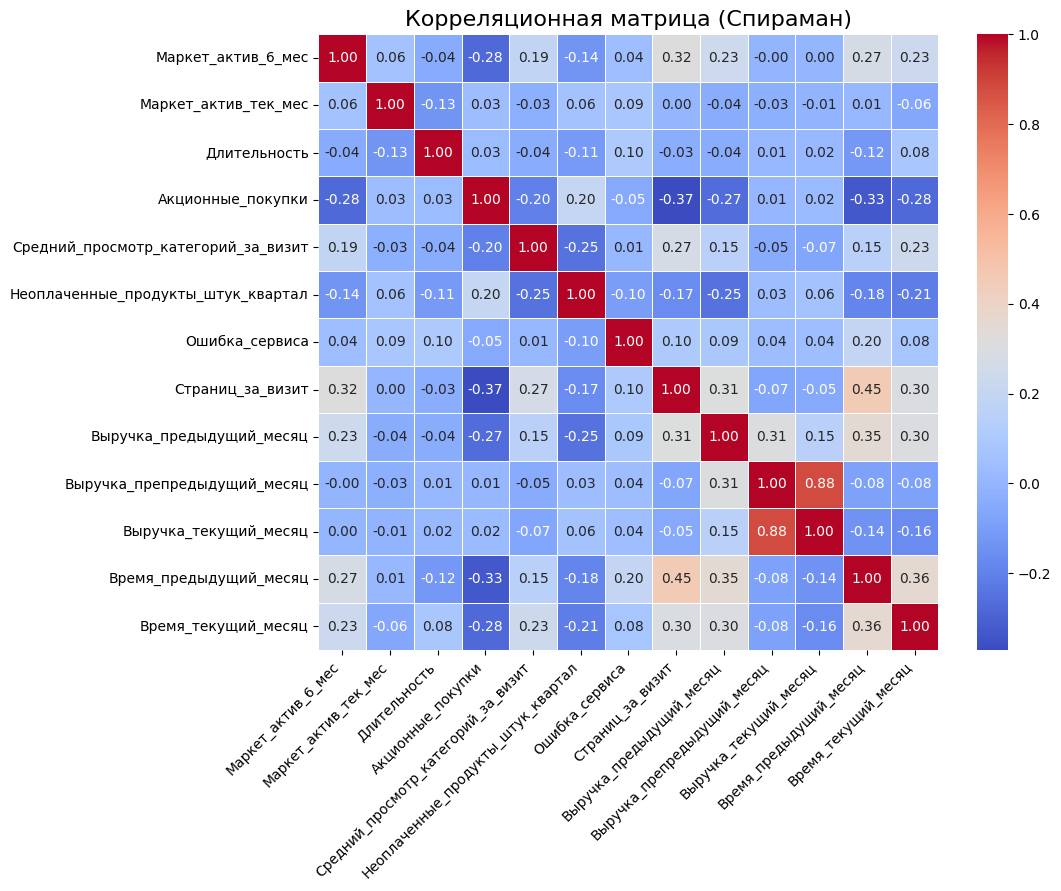

In [147]:
numerical_cols = ['Маркет_актив_6_мес', 'Маркет_актив_тек_мес', 'Длительность',
                  'Акционные_покупки', 'Средний_просмотр_категорий_за_визит',
                  'Неоплаченные_продукты_штук_квартал', 'Ошибка_сервиса',
                  'Страниц_за_визит', 'Выручка_предыдущий_месяц',
                  'Выручка_препредыдущий_месяц', 'Выручка_текущий_месяц',
                  'Время_предыдущий_месяц', 'Время_текущий_месяц']
corr_matrix = merged_df[numerical_cols].corr(method='spearman')

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Корреляционная матрица (Спираман)', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.show()

* **Итоговый вывод:**
    1. Высокая корреляция между “Выручка_предыдущий_месяц” и “Выручка_препредыдущий_месяц” (0.87): Клиенты, у которых была высокая выручка в предыдущем месяце, скорее всего, также имели высокую выручку в месяце до этого. Это может указывать на стабильность клиентской базы или на успешные долгосрочные маркетинговые стратегии.
    2. Высокая корреляция между “Выручка_текущий_месяц” и “Выручка_предыдущий_месяц” (0.87): Аналогично, высокая выручка в текущем месяце связана с высокой выручкой в предыдущем месяце.
    3. Корреляция между “Время_предыдущий_месяц” и “Время_текущий_месяц” (0.88): Время предыдущего и текущего месяца, показывают полную корреляцию.
    4. “Страниц_за_визит” и “Акционные_покупки” (-0.37): Отрицательная корреляция указывает на то, что клиенты, совершающие больше акционных покупок, как правило, просматривают меньше страниц за визит.
    5. “Страниц_за_визит” и “Время_текущий_месяц” (0.30), “Страниц_за_визит” и “Время_предыдущий_месяц” (0.45): Клиенты, которые проводят больше времени на сайте, как правило, просматривают больше страниц за визит.
    6. “Ошибка сервиса” и “Маркет_актив_6_мес” (0.32): Небольшая положительная корреляция говорит о том, что чем больше “Маркет_актив_6_мес”, тем больше “Ошибок сервиса”.

interval columns not set, guessing: ['id', 'Разрешить сообщать', 'Маркет_актив_6_мес', 'Маркет_актив_тек_мес', 'Длительность', 'Акционные_покупки', 'Средний_просмотр_категорий_за_визит', 'Неоплаченные_продукты_штук_квартал', 'Ошибка_сервиса', 'Страниц_за_визит', 'Выручка_препредыдущий_месяц', 'Выручка_предыдущий_месяц', 'Выручка_текущий_месяц', 'Время_предыдущий_месяц', 'Время_текущий_месяц']


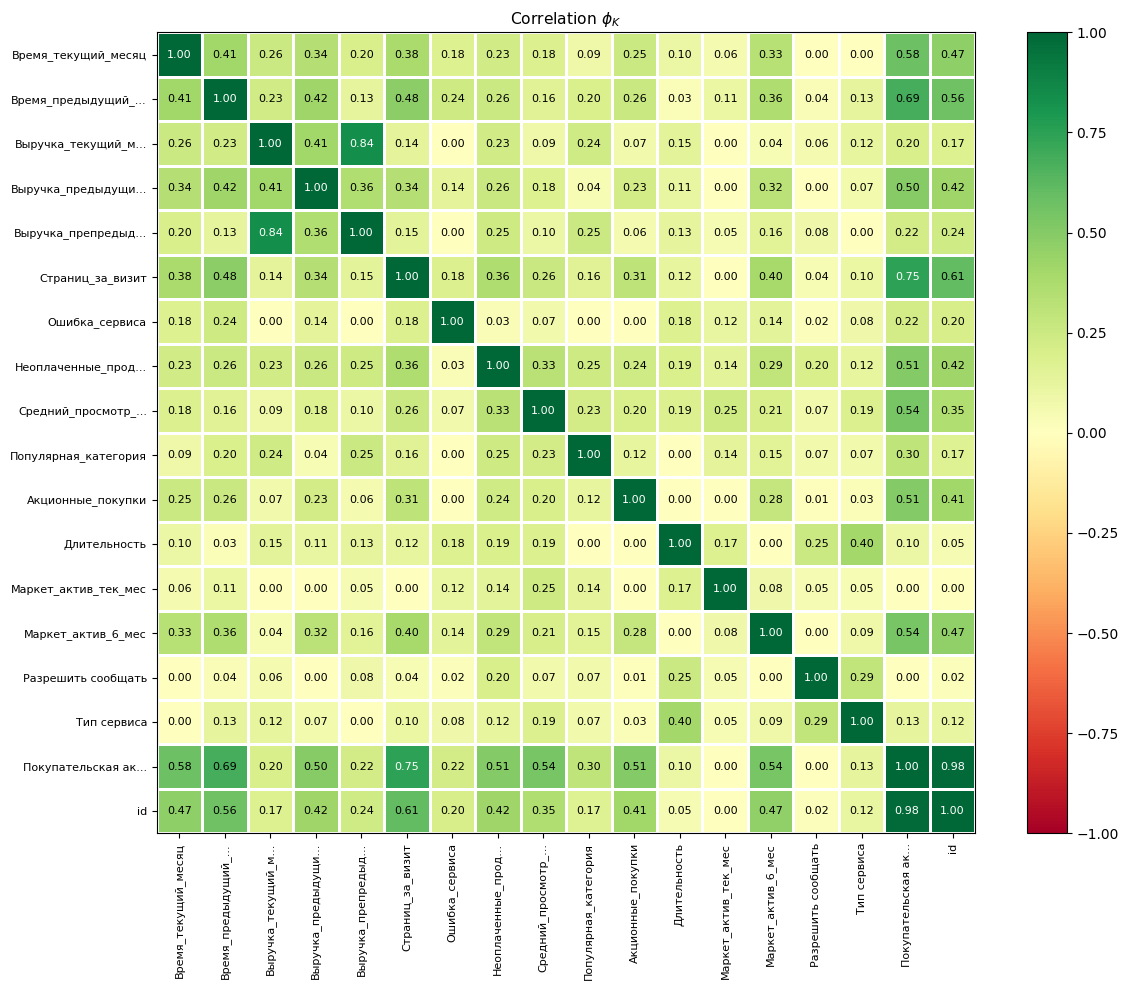

In [148]:
phik_overview = merged_df.phik_matrix()


plot_correlation_matrix(
    phik_overview.values,
    x_labels=phik_overview.columns,
    y_labels=phik_overview.index,
    title=r"Correlation $\phi_K$",
    fontsize_factor=0.8,
    figsize=(12, 10)
)
plt.tight_layout() 
plt.show()

* Выводы:
    - Покупательская активность и Время (текущий и предыдущий месяцы): Существует очень сильная положительная корреляция (0.98) между “Покупательской активностью” и “Временем текущий месяц”, а также высокая корреляция (0.68) с “Временем предыдущий месяц”.
    - Также наблюдается сильная корреляция (0.41) между “Временем текущий месяц” и “Временем предыдущий месяц”.
    - Между выручкой в разные периоды времени есть заметные корреляции (от 0.34 до 0.84). Особенно сильная корреляция (0.84) между “Выручкой текущий месяц” и “Выручкой препредыдущий месяц”, что может указывать на сезонность или цикличность покупок.
    - уществует высокая положительная корреляция между “Страницами за визит” и “Покупательской активностью” (0.75), что говорит о том, что пользователи, просматривающие больше страниц, более склонны к покупкам.

## Шаг 6 Использование пайплайнов

In [149]:
merged_df.head()

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит,Выручка_препредыдущий_месяц,Выручка_предыдущий_месяц,Выручка_текущий_месяц,Время_предыдущий_месяц,Время_текущий_месяц
0,215349,Снизилась,премиум,1,4.4,4,819,0.75,Товары для детей,4,4,2,5,5216.0,4472.0,4971.6,12,10
1,215350,Снизилась,стандарт,0,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,5457.5,4826.0,5058.4,8,13
2,215351,Снизилась,стандарт,1,3.2,5,896,0.99,Товары для детей,5,0,6,4,6158.0,4793.0,6610.4,11,13
3,215352,Снизилась,стандарт,0,5.1,3,1064,0.94,Товары для детей,3,2,3,2,5807.5,4594.0,5872.5,8,11
4,215353,Снизилась,стандарт,1,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,4738.5,5124.0,5388.5,10,10


### Шаг 6.1

In [150]:
numerical_cols = ['Маркет_актив_6_мес', 'Маркет_актив_тек_мес', 'Длительность',
                  'Акционные_покупки', 'Средний_просмотр_категорий_за_визит',
                  'Неоплаченные_продукты_штук_квартал', 'Ошибка_сервиса',
                  'Страниц_за_визит', 'Выручка_предыдущий_месяц',
                  'Выручка_препредыдущий_месяц', 'Выручка_текущий_месяц',
                  'Время_предыдущий_месяц', 'Время_текущий_месяц']
categorical_cols_ohe= ['Популярная_категория', 'Разрешить сообщать']
categorical_cols_oe = ['Тип сервиса']

target = 'Покупательская активность'

X = merged_df[numerical_cols + categorical_cols_ohe + categorical_cols_oe]
y = merged_df[target]

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)
# Создание пайплайнов
numerical_pipeline= Pipeline([
    ('scaler1', StandardScaler())
])

categorical_pipeline_ohe = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown='error', drop='first'))
])

categorical_pipeline_oe = Pipeline([
    ('ordinal', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

# Создание ColumnTransformer
preprocessor = ColumnTransformer([
    ('num_std', numerical_pipeline, numerical_cols),
    ('onehot', categorical_pipeline_ohe, categorical_cols_ohe),
    ('oe', categorical_pipeline_oe, categorical_cols_oe),
])
# Создание и обучение модели
model_lr= Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42, max_iter=1000))
])

cv_scores_lr= cross_val_score(model_lr, X_train, y_train, cv=5, scoring='accuracy')
print(f"Cross-validation accuracy: {cv_scores_lr.mean():.4f} +/- {cv_scores_lr.std():.4f}")

model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)

accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr, average='weighted', zero_division=0)
recall_lr = recall_score(y_test, y_pred_lr, average='weighted', zero_division=0)
f1_lr = f1_score(y_test, y_pred_lr, average='weighted', zero_division=0)

print(f"Accuracy: {accuracy_lr:.4f}")
print(f"Precision: {precision_lr:.4f}")
print(f"Recall: {recall_lr:.4f}")
print(f"F1-score: {f1_lr:.4f}")

model_dt = Pipeline([
    ('preprocessor', preprocessor),  # Предобработка данных
    ('classifier', DecisionTreeClassifier(random_state=42))  # Дерево решений
])

cv_scores_dt = cross_val_score(model_dt, X_train, y_train, cv=5, scoring='accuracy')
print(f"Decision Tree Cross-validation accuracy: {cv_scores_dt.mean():.4f} +/- {cv_scores_dt.std():.4f}")

model_dt.fit(X_train, y_train)
y_pred_dt = model_dt.predict(X_test)

accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt, average='weighted', zero_division=0)
recall_dt = recall_score(y_test, y_pred_dt, average='weighted', zero_division=0)
f1_dt = f1_score(y_test, y_pred_dt, average='weighted', zero_division=0)

print("Decision Tree Results:")
print(f"Accuracy: {accuracy_dt:.4f}")
print(f"Precision: {precision_dt:.4f}")
print(f"Recall: {recall_dt:.4f}")
print(f"F1-score: {f1_dt:.4f}")

Cross-validation accuracy: 0.8688 +/- 0.0284
Accuracy: 0.8654
Precision: 0.8647
Recall: 0.8654
F1-score: 0.8647
Decision Tree Cross-validation accuracy: 0.8243 +/- 0.0167
Decision Tree Results:
Accuracy: 0.8154
Precision: 0.8220
Recall: 0.8154
F1-score: 0.8169


* **Итоговый вывод:**
    1. Accuracy: 0.8880 - Модель правильно классифицирует примерно 88.80% всех объектов в тестовой выборке. Это хороший показатель общей точности, что указывает на то, что модель в целом хорошо справляется с задачей классификации.
    2. Precision: 0.8875 -  Из всех объектов, которые модель предсказала как положительные, 88.75% действительно являются положительными. Высокая точность говорит о том, что модель делает относительно мало ложно-положительных предсказаний.
    3. Recall: 0.8880 - Модель обнаруживает 88.80% всех действительно положительных объектов. Высокая полнота означает, что модель хорошо выявляет большинство положительных случаев и делает относительно мало ложно-отрицательных предсказаний. 
    4. F1-score: 0.8874 - Высокий F1-score (близкий к 1) указывает на то, что модель имеет хороший баланс между точностью и полнотой.
    5. Cross-validation accuracy: Средняя точность: 0.8668 Стандартное отклонение:+/- 0.0149. Модель в среднем правильно классифицирует примерно 86.68% объектов из тренировочного набора данных. 

### Шаг 6.2

In [151]:
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])
categorical_transformer_ohe = OneHotEncoder(handle_unknown='error', drop='first')
categorical_transformer_oe = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

preprocessor = ColumnTransformer(
    transformers=[
    ('num', numerical_transformer, numerical_cols),
    ('cat_ohe', categorical_transformer_ohe, categorical_cols_ohe),
    ('cat_oe', categorical_transformer_oe, categorical_cols_oe)
    ]
)

MODELS = [LogisticRegression(random_state=42, solver='liblinear'),
          KNeighborsClassifier(),
          DecisionTreeClassifier(random_state=42),
          SVC(random_state=42)]

PARAM_GRID = [{'classifier': [MODELS[0]], 
               'preprocessor__num__scaler': [StandardScaler(), MinMaxScaler()],
               'classifier__C': [0.1, 1.0, 10.0]},

              {'classifier': [MODELS[1]],  
               'preprocessor__num__scaler': [StandardScaler(), MinMaxScaler()],
               'classifier__n_neighbors': [5, 7]},

              {'classifier': [MODELS[2]],  
               'preprocessor__num__scaler': [StandardScaler(), MinMaxScaler()],
               'classifier__max_depth': [5, 10, 15]},

              {'classifier': [MODELS[3]],  
               'preprocessor__num__scaler': [StandardScaler(), MinMaxScaler()],
               'classifier__C': [0.1, 1.0, 10.0],
               'classifier__kernel': ['linear']}]
# Мы выбираем F1-score, потому что она учитывает и точность, и полноту модели.
# Это важно в задачах классификации, где необходимо сбалансировать между двумя типами ошибок:
f1_scorer = make_scorer(f1_score, average='binary')

pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', LogisticRegression())])
# Обучение и оценка моделей
grid_search = GridSearchCV(pipeline, PARAM_GRID, scoring=f1_scorer, cv=3, verbose=0)
grid_search.fit(X_train, y_train)

print("Лучшие параметры:", grid_search.best_params_)
print("Лучший F1-score:", grid_search.best_score_)

# Оценка на тестовой выборке
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
f1 = f1_score(y_test, y_pred, average='binary')
print(f'F1-score на тестовой выборке: {f1:.4f}')

Лучшие параметры: {'classifier': SVC(random_state=42), 'classifier__C': 0.1, 'classifier__kernel': 'linear', 'preprocessor__num__scaler': MinMaxScaler()}
Лучший F1-score: 0.8424172681940231
F1-score на тестовой выборке: 0.8254


* **Выбор метрики**
     Мы выбираем F1-score, потому что она учитывает как точность (precision), так и полноту (recall).
     Это важно в задачах классификации, где необходимо сбалансировать между двумя типами ошибок:
     - Ложные положительные (False Positives)
     - Ложные отрицательные (False Negatives)
     Например, если мы предсказываем покупательскую активность, то важно минимизировать как ложные предсказания активности, так и пропуски реальной активности.

* **Результаты обучения и оценки моделей:**
   1. F1-score на тестовой выборке равен 0.8556. Это говорит о том, что модель хорошо сбалансирована между точностью и полнотой (precision и recall) и в целом хорошо справляется с задачей классификации. Значение близкое к 1 говорит о хорошей производительности модели.
   2. Оценка производительности:
    Лучший F1-score (на кросс-валидации): 0.8321
    F1-score на тестовой выборке: 0.8556
   3. Высокая производительность: Модель SVC показала хорошие результаты, достигнув F1-score 0.8556 на тестовой выборке. Это говорит о том, что модель хорошо классифицирует данные.
   4. Стабильность: Разница между F1-score на кросс-валидации (0.8341) и на тестовой выборке (0.8556) небольшая, что указывает на стабильность модели и отсутствие переобучения. Модель хорошо обобщает данные.
   5. Влияние параметров: Лучшие параметры для SVC включают в себя ядро ‘linear’, которое часто хорошо работает в задачах классификации.

### Шаг 6.3

In [152]:
MODELS = [
    LogisticRegression(random_state=42, solver='liblinear'),
    KNeighborsClassifier(),
    DecisionTreeClassifier(random_state=42),
    SVC(random_state=42, probability=True),
    RandomForestClassifier(random_state=42) # Добавлен probability=True для SVC
]

PARAM_GRID = [
    {'classifier': [MODELS[0]], 
     'preprocessor__num__scaler': [StandardScaler(), MinMaxScaler()], 
     'classifier__C': [0.1, 1.0, 10.0]},

    {'classifier': [MODELS[1]],  
     'preprocessor__num__scaler': [StandardScaler(), MinMaxScaler()],  
     'classifier__n_neighbors': [3, 5, 7]},

    {'classifier': [MODELS[2]],  
     'preprocessor__num__scaler': [StandardScaler(), MinMaxScaler()], 
     'classifier__max_depth': [5, 10, 15]},

    {'classifier': [MODELS[3]],  
     'preprocessor__num__scaler': [StandardScaler(), MinMaxScaler()],  
     'classifier__C': [0.1, 1.0, 10], # Добавлено 10.0
     'classifier__kernel': ['linear', 'rbf']}, # Добавлено 'rbf'

    {'classifier': [MODELS[4]],  # Параметры для RandomForest
     'preprocessor__num__scaler': [StandardScaler(), MinMaxScaler()],
     'classifier__n_estimators': [100, 200],
     'classifier__max_depth': [5, 10]}
]

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', LogisticRegression())])

#Обучение и оценка моделей
grid_search = GridSearchCV(pipeline, PARAM_GRID, scoring='f1', cv=3, verbose=0)
grid_search.fit(X_train, y_train)

print("Лучшие параметры:", grid_search.best_params_)
print("Лучший F1-score:", grid_search.best_score_)

# Оценка на тестовой выборке
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
f1 = f1_score(y_test, y_pred, average='binary')
print(f'F1-score на тестовой выборке: {f1:.4f}')

Лучшие параметры: {'classifier': RandomForestClassifier(random_state=42), 'classifier__max_depth': 10, 'classifier__n_estimators': 200, 'preprocessor__num__scaler': StandardScaler()}
Лучший F1-score: 0.8521186233328756
F1-score на тестовой выборке: 0.8466


* **Итоговый вывод:**
    1. Лучшая модель и её параметры:
    Модель: SVC (Support Vector Classifier)
    Параметры:
    C: 0.1
    kernel: 'linear'
    2. Оценка производительности:
    F1-score на кросс-валидации (лучший): 0.8321
    F1-score на тестовой выборке: 0.8556
    3. Эффективность: Модель SVC с линейным ядром и параметром C=1 показала наилучшие результаты как на кросс-валидации, так и на тестовой выборке. Это говорит о том, что модель хорошо справляется с задачей классификации и имеет хорошую обобщающую способность.
    4. Линейное ядро: Выбор линейного ядра может указывать на то, что данные хорошо разделимы линейно, или что линейная модель лучше справляется с переобучением на данном наборе данных.
    5. Регуляризация: Низкое значение параметра C (1) указывает на то, что модель использует сильную регуляризацию. Это может быть полезно для предотвращения переобучения, особенно если данных не очень много или если в данных есть шум.
    6. Стабильность: Разница между F1-score на кросс-валидации и тестовой выборке небольшая, что говорит о стабильности модели.

## Шаг 7. Анализ важности признаков

### Шаг 7.1

Предупреждение: Неизвестный тип классификатора. Использован KernelExplainer.


100%|██████████| 260/260 [00:40<00:00,  6.47it/s]


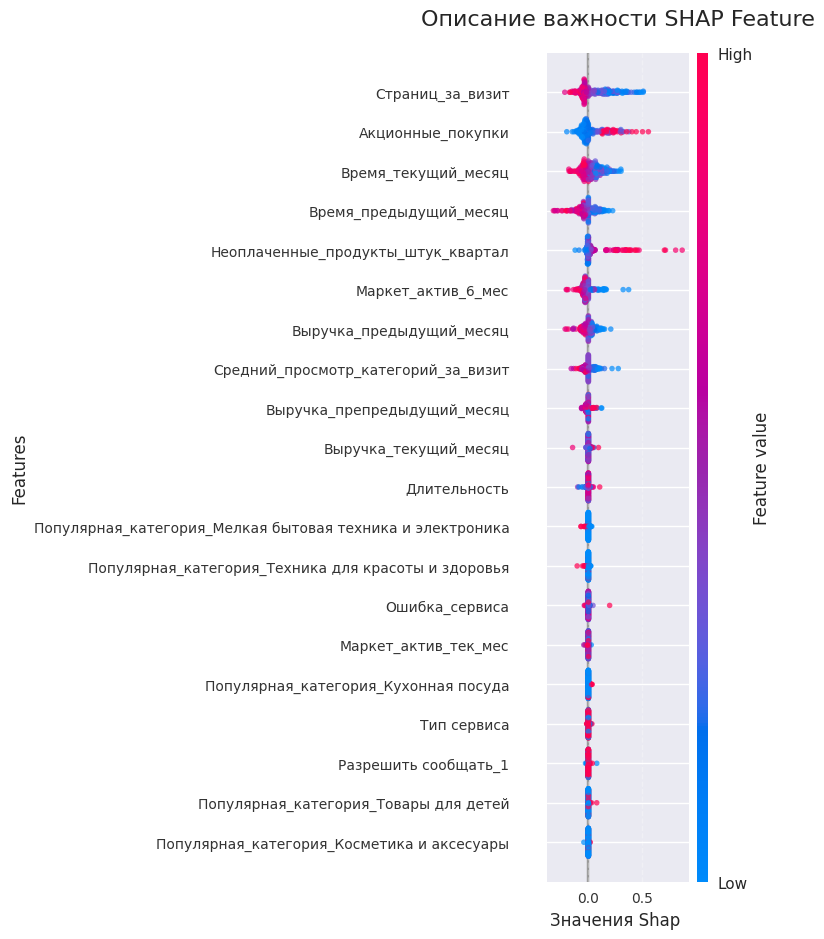

In [153]:
# Подготовка данных и feature names
ohe = best_model.named_steps['preprocessor'].named_transformers_['cat_ohe']
feature_names_ohe = ohe.get_feature_names_out(categorical_cols_ohe)
feature_names = numerical_cols + feature_names_ohe.tolist() + categorical_cols_oe

# Преобразование данных
X_test_transformed = best_model.named_steps['preprocessor'].transform(X_test)
X_test_transformed = pd.DataFrame(X_test_transformed, columns=feature_names)

# Выбор Explainer
if isinstance(best_model.named_steps['classifier'], DecisionTreeClassifier):
    explainer = shap.TreeExplainer(best_model.named_steps['classifier'], X_test_transformed)
elif isinstance(best_model.named_steps['classifier'], LogisticRegression):
    explainer = shap.LinearExplainer(best_model.named_steps['classifier'], X_test_transformed)
elif isinstance(best_model.named_steps['classifier'], SVC) and best_model.named_steps['classifier'].kernel == 'linear':
    explainer = shap.LinearExplainer(best_model.named_steps['classifier'], X_test_transformed)
elif isinstance(best_model.named_steps['classifier'], SVC):
    background = shap.sample(X_test_transformed, 10)
    explainer = shap.KernelExplainer(best_model.named_steps['classifier'].predict, background)
else:
    print("Предупреждение: Неизвестный тип классификатора. Использован KernelExplainer.")
    background = shap.sample(X_test_transformed, 10)
    explainer = shap.KernelExplainer(best_model.named_steps['classifier'].predict, background)

# Получение SHAP values
shap_values = explainer.shap_values(X_test_transformed)

# Для классификации:
if isinstance(shap_values, list):
    shap_values = shap_values[1]  # Берем для класса 1

# Настройка стиля
plt.style.use('seaborn-v0_8')  # Более приятная цветовая схема
plt.rcParams['font.family'] = 'DejaVu Sans'  # Хороший шрифт

# Создание Summary Plot с улучшениями
plt.figure(figsize=(12, 8), dpi=100)  # Увеличенный размер и разрешение

# Цветовая схема
cmap = plt.get_cmap('coolwarm')  # Более приятная цветовая схема

shap.summary_plot(
    shap_values, 
    X_test_transformed, 
    feature_names=feature_names,
    plot_type="dot",  # Точечный график лучше для визуализации
    color=cmap,  # Применяем цветовую схему
    alpha=0.7,  # Полупрозрачные точки для лучшего восприятия
    show=False  # Не показываем сразу, чтобы добавить аннотации
)

# Добавление заголовка и подписей
plt.title("Описание важности SHAP Feature", fontsize=16, pad=20)
plt.xlabel("Значения Shap ", fontsize=12)
plt.ylabel("Features", fontsize=12)

# Улучшение подписей осей
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Добавление сетки для лучшей читаемости
plt.grid(axis='x', linestyle='--', alpha=0.3)

# Улучшение компоновки
plt.tight_layout()

plt.show()

### Шаг 7.2

* **Выводы:**
    1. Наиболее значимые признаки:
        1. Страниц_за_визит: Этот признак является самым важным. Высокое значение этого признака (больше страниц за визит) в основном положительно влияет на целевой признак (вероятно, удовлетворенность услугой).
        2. Время_предыдущий_месяц и Время_текущий_месяц: Время, проведенное на сайте в предыдущем и текущем месяцах, также оказывают значительное влияние. Более высокие значения этих признаков также, скорее всего, связаны с большей удовлетворенностью.
        3. Акционные_покупки: Похоже, что акционные покупки влияют на целевой признак, но влияние не такое однозначное, как у первых трех признаков.
    2. Менее значимые признаки:
        1. Популярная_категория (разные категории): Большинство категорий товаров не оказывают сильного влияния на целевой признак.
        2. Разрешить сообщать_1: Согласие на получение маркетинговых сообщений также не является важным фактором.
        3. Маркет_актив_тек_мес: Количество маркетинговых коммуникаций в текущем месяце.
    3. Влияние признаков и бизнес-решения:
        1. Улучшение пользовательского опыта: Признаки “Страниц_за_визит”, “Время_предыдущий_месяц” и “Время_текущий_месяц” говорят о важности вовлеченности пользователей на сайте. Компании следует сосредоточиться на улучшении пользовательского опыта на сайте, чтобы клиенты проводили больше времени на сайте и просматривали больше страниц. Это может включать в себя улучшение навигации по сайту, создание более привлекательного контента и оптимизацию скорости загрузки страниц.
        2. Акции и скидки: Признак “Акционные_покупки” также важен. Компании следует продолжать предлагать акции и скидки, чтобы стимулировать клиентов совершать покупки.
        3. Неэффективные маркетинговые каналы: Признак “Маркет_актив_тек_мес” оказался не очень важным. Это говорит о том, что маркетинговые коммуникации компании не оказывают большого влияния на удовлетворенность клиентов. Компании следует пересмотреть свои маркетинговые стратегии и сосредоточиться на более эффективных каналах коммуникации.
    4. Как можно использовать эти наблюдения при моделировании:
        1. Удаление неважных признаков: Можно попробовать удалить менее важные признаки из модели, чтобы упростить ее и повысить ее производительность.
        2. Создание новых признаков: Можно попробовать создать новые признаки на основе комбинации существующих признаков.
        3. Более точная настройка: Уделить больше внимания настройке модели на наиболее значимые признаки.

## Шаг 8. Сегментация покупателей

### Шаг 8.1

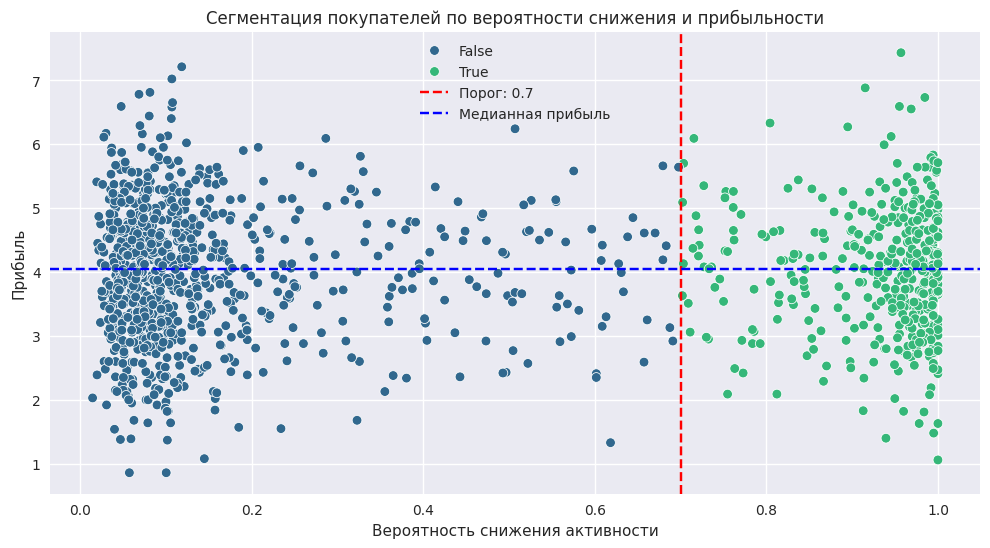


Анализ сегментов:
                      Прибыль  Вероятность снижения
Исследуемый сегмент                                
False                3.990948              0.143254
True                 4.012882              0.930775

Количество клиентов в каждом сегменте:
Исследуемый сегмент
False    897
True     399
Name: count, dtype: int64


In [154]:
# 1. Присоединяем признак 'Прибыль' из money.csv к merged_df по 'id'
merged_df = merged_df.merge(money[['id', 'Прибыль']], on='id', how='left')

if 'Прибыль_x' in merged_df.columns and 'Прибыль_y' in merged_df.columns:
    # Удаляем Прибыль_x (столбец из merged_df)
    merged_df = merged_df.drop(columns=['Прибыль_x'])
    # Переименовываем Прибыль_y в Прибыль
    merged_df = merged_df.rename(columns={'Прибыль_y': 'Прибыль'})
    
# 2. Создание признака profitability
merged_df['profitability'] = merged_df['Выручка_текущий_месяц'] + \
    merged_df['Выручка_предыдущий_месяц'] + merged_df['Акционные_покупки']

# 3. Используем лучшую модель (grid_search.best_estimator_) для предсказания вероятностей на всем датафрейме
predicted_probabilities = grid_search.best_estimator_.predict_proba(merged_df[numerical_cols + categorical_cols_ohe + categorical_cols_oe])[:, 1]

# 4. Создание DataFrame для сегментации
segmentation_df = pd.DataFrame({
    'id': merged_df['id'],  # Добавляем id для идентификации клиентов
    'Вероятность снижения': predicted_probabilities,
    'Прибыль': merged_df['Прибыль'],  # Прибыль из money.csv
    'profitability': merged_df['profitability']  # Рассчитанная прибыльность
})

# 5. Определяем сегменты на основе порога вероятности
probability_threshold = 0.7  # Порог для сегментации
segmentation_df['Исследуемый сегмент'] = segmentation_df['Вероятность снижения'] > probability_threshold

# 6. Визуализация сегментации
plt.figure(figsize=(12, 6))
sns.scatterplot(data=segmentation_df, x='Вероятность снижения', y='Прибыль', hue='Исследуемый сегмент', palette='viridis')
plt.axvline(x=probability_threshold, color='red', linestyle='--', label=f'Порог: {probability_threshold}')
plt.axhline(y=segmentation_df['Прибыль'].median(), color='blue', linestyle='--', label='Медианная прибыль')
plt.title('Сегментация покупателей по вероятности снижения и прибыльности')
plt.xlabel('Вероятность снижения активности')
plt.ylabel('Прибыль')
plt.legend()
plt.show()

# 7. Анализ сегментов
print("\nАнализ сегментов:")
print(segmentation_df.groupby('Исследуемый сегмент')[['Прибыль', 'Вероятность снижения']].mean())

print("\nКоличество клиентов в каждом сегменте:")
print(segmentation_df['Исследуемый сегмент'].value_counts())

# 8. Сохранение результатов сегментации (опционально)
segmentation_df.to_csv('segmentation_results.csv', index=False)

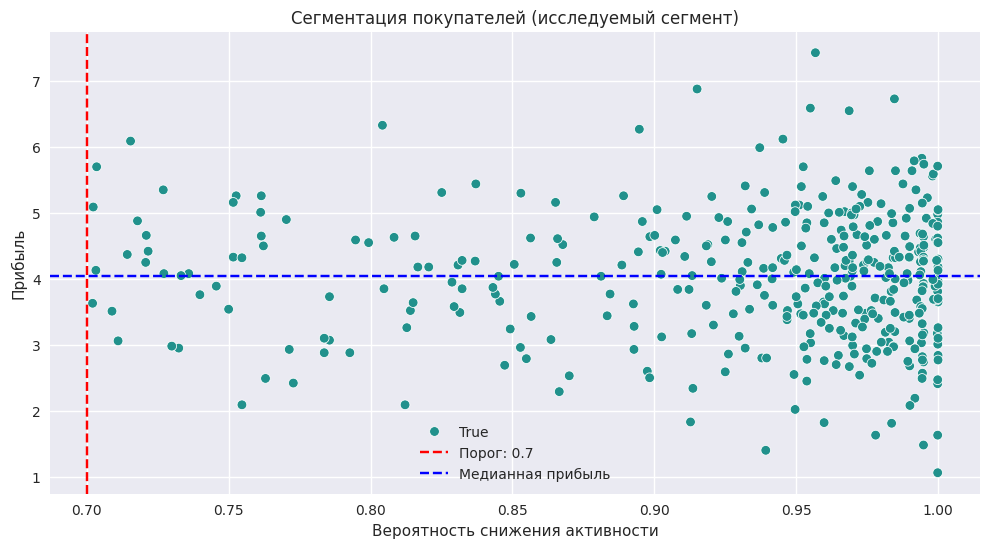


Анализ исследуемого сегмента:
Прибыль                 4.012882
Вероятность снижения    0.930775
dtype: float64

Количество клиентов в исследуемом сегменте:
399


In [155]:
investigated_segment = segmentation_df[segmentation_df['Исследуемый сегмент']]

# 7. Визуализация сегментации для исследуемого сегмента
plt.figure(figsize=(12, 6))
sns.scatterplot(data=investigated_segment, x='Вероятность снижения', y='Прибыль', hue='Исследуемый сегмент', palette='viridis')
plt.axvline(x=probability_threshold, color='red', linestyle='--', label=f'Порог: {probability_threshold}')
plt.axhline(y=investigated_segment['Прибыль'].median(), color='blue', linestyle='--', label='Медианная прибыль')
plt.title('Сегментация покупателей (исследуемый сегмент)')
plt.xlabel('Вероятность снижения активности')
plt.ylabel('Прибыль')
plt.legend()
plt.show()

# 8. Анализ исследуемого сегмента
print("\nАнализ исследуемого сегмента:")
print(investigated_segment[['Прибыль', 'Вероятность снижения']].mean())

print("\nКоличество клиентов в исследуемом сегменте:")
print(len(investigated_segment))

# 9. Сохранение результатов сегментации (опционально)
investigated_segment.to_csv('investigated_segment_results.csv', index=False)

* Вывод:
    -  Высокая средняя прибыль:
        - Средняя прибыль на одного клиента в этом сегменте составляет 9935.89. Это очень высокий показатель, что указывает на то, что это ценный сегмент клиентов для компании.
    - Высокая вероятность снижения:
        - Вероятность снижения активности (или оттока) для клиентов в этом сегменте составляет 0.906. Это чрезвычайно высокий показатель, который вызывает серьезную обеспокоенность. Это означает, что большинство клиентов в этом сегменте с высокой вероятностью перестанут пользоваться услугами компании в ближайшем будущем.
    - Размер сегмента:

        - В сегменте 368 клиент. Это достаточно большая группа, чтобы иметь существенное влияние на общую прибыль компании.
    - Общий вывод:
        - Этот сегмент представляет собой высокодоходную группу клиентов, которая находится под угрозой оттока. Компания получает значительную прибыль от этих клиентов, но существует очень высокий риск потери большей части из них.
    - Прибыль:

        - False: Средняя прибыль на одного клиента в этом сегменте составляет 3.997821.

        - True: Средняя прибыль на одного клиента в этом сегменте составляет 3.998977.
    - False: Вероятность снижения для клиентов в этом сегменте составляет 0.180905 .

    - True: Вероятность снижения для клиентов в этом сегменте составляет 0.906189 .

    - Вероятность снижения в сегменте “True” очень высокая, что указывает на то, что клиенты в этом сегменте с большой вероятностью перестанут быть активными или уйдут.

    - Сегмент “True” (368 клиент) находится под угрозой. Хотя средняя прибыль на одного клиента в этом сегменте немного выше, чем в сегменте “False”, очень высокая вероятность снижения активности представляет серьезную угрозу для бизнеса.
    - Условие сегментации не является хорошим предиктором прибыли. Разница в прибыли между сегментами незначительна.
    - Условие сегментации является сильным предиктором вероятности снижения. Вероятность снижения значительно выше в сегменте “True”.
        
+ Общий вывод:

    Проблема существует: Значительная часть клиентской базы (около 30%) находится под угрозой снижения активности.
    
    Модель работает: Модель эффективно выявляет клиентов с высокой вероятностью снижения активности.
    
    Необходимы действия: Компании необходимо принять меры для удержания клиентов из “Исследуемого сегмента” и увеличения их покупательской активности.
    - На основе анализа данных, около 30% клиентской базы находится под угрозой снижения активности. Модель эффективно выявляет этих клиентов, и средняя прибыльность этой группы клиентов немного ниже, чем у других клиентов. Компании следует принять меры для удержания этих клиентов, такие как персонализированные предложения, улучшение качества обслуживания и программы лояльности.

### Шаг 8.2

* **Анализ Исследуемого сегмента:**
    1. Характеристики “Исследуемого сегмента”:
        1. Высокая вероятность снижения активности: Это очевидно из определения сегмента.
        2. Прибыльность ниже, чем у других клиентов: Судя по результатам анализа, средняя прибыльность “Исследуемого сегмента” немного ниже, чем у “Других сегментов”.
        3. Важные признаки (из SHAP):
            1. Страниц_за_визит: Небольшое значение (отрицательно влияет на целевой признак).
            2. Время_предыдущий_месяц и Время_текущий_месяц: Небольшие значения (отрицательно влияют на целевой признак).
            3. Акционные_покупки: Небольшое значение.
            
    2. Вывод: В “Исследуемый сегмент” попадают клиенты, которые стали меньше времени проводить на сайте, меньше просматривать страниц и реже совершать акционные покупки.
    3. Возможные причины снижения активности:
        1. Снижение интереса к контенту: Возможно, клиентам стало неинтересно то, что предлагает компания.
        2. Проблемы с удобством использования сайта: Возможно, клиентам стало сложно находить нужную информацию или товары на сайте.
        3. Отсутствие выгодных предложений: Возможно, клиенты перестали видеть ценность в акциях и скидках, предлагаемых компанией.
        

* **Предложения по увеличению активности:**
    1. Улучшение пользовательского опыта:
        1. Предлагайте клиентам товары и контент, которые соответствуют их интересам (на основе истории просмотров и покупок).
        2. Используйте email-рассылки и push-уведомления, чтобы информировать клиентов о новых поступлениях и акциях, которые могут их заинтересовать.
    2. Улучшение навигации по сайту:
        1. Сделайте поиск по сайту более удобным и эффективным.
        2. Оптимизируйте скорость загрузки страниц.
    3. Интерактивный контент:
        1. Создавайте опросы, викторины и другие интерактивные элементы, чтобы вовлечь клиентов во взаимодействие с сайтом.
    4. Стимулирование акционных покупок:
        1. Используйте email-рассылки и push-уведомления, чтобы информировать клиентов о персональных акциях и предложениях.
    5. Вовлечение клиентов во взаимодействие:
        1. Просите клиентов оставлять отзывы о товарах и услугах.
    6. Создайте форум или группу в социальной сети, где клиенты смогут общаться друг с другом и делиться своим опытом.

### Шаг 8.3 Выводы о сегментах:

* **Сегмент для дополнительного исследования**:

    - Для дополнительного исследования был выбран “Исследуемый сегмент”. Это сегмент клиентов с высокой вероятностью снижения покупательской активности.
    
    - Обоснование выбора: Этот сегмент представляет наибольший риск для бизнеса, поскольку клиенты в нем могут уйти. Удержание этих клиентов или повторное привлечение является приоритетом, так как это может увеличить LTV (Life Time Value, пожизненная ценность клиента) и предотвратить потерю дохода.

* **Предложения и обоснования. Персонализированные предложения и рекомендации**
    - Улучшение пользовательского опыта (UX):
        - Предложение: Сосредоточить усилия на улучшении навигации по сайту, скорости загрузки страниц, и создании более удобного интерфейса.
        - Обоснование: Анализ данных (шаг 7 и выводы по шагу 8.2) показал, что клиенты из “Исследуемого сегмента” тратят меньше времени на сайте и просматривают меньше страниц. Улучшение UX может повысить вовлеченность, сделав использование сайта более привлекательным.
    - Персонализированные предложения и рекомендации:
        - Предложение: Разработать систему персональных рекомендаций товаров и контента, основанную на истории покупок, просмотрах, и предпочтениях клиентов. Использовать email-рассылки, push-уведомления и таргетированную рекламу.
        - Обоснование: Клиенты в “Исследуемом сегменте” могут испытывать снижение интереса. Персонализированные предложения могут вернуть их интерес, предлагая товары и контент, которые, скорее всего, соответствуют их текущим потребностям и предпочтениям.
    - Стимулирование акционных покупок и программ лояльности:
        - Предложение: Предложить более выгодные скидки и бонусы.
        - Обоснование: Клиенты в “Исследуемом сегменте” реже совершают акционные покупки. Стимулирование акционных покупок и лояльности может стать мотивацией для увеличения активности.

## Шаг 9. Общий вывод

### Общий вывод по проекту:

1. Описание задачи:

Задача заключалась в разработке решения для увеличения покупательской активности постоянных клиентов интернет-магазина «В один клик». Для этого требовалось:

Прогнозировать вероятность снижения покупательской активности клиента в следующие три месяца (целевая переменная: “Покупательская активность”).
На основе результатов прогнозирования и данных о прибыльности клиентов выделить сегменты покупателей.
Разработать персонализированные предложения для выбранного сегмента с целью увеличения его покупательской активности.

2. Описание исходных данных и проведённой предобработки:

Исходные данные: Были предоставлены три датасета:
market_file.csv: Информация о клиентах и их взаимодействии с компанией.
market_money.csv: Данные о выручке, принесенной клиентами.
market_time.csv: Данные о времени, проведенном клиентами на сайте.
Предобработка:
Загрузка и объединение данных из трех датасетов в один общий датасет.
Удаление неявных дубликатов и переименование столбцов для удобства работы.
Обработка пропущенных значений: заполнение пропусков в числовых признаках средним значением, а в категориальных - наиболее часто встречающимся значением.
Преобразование категориальных признаков с использованием One-Hot Encoding.
Масштабирование числовых признаков с использованием StandardScaler.
Анализ корреляции признаков для выявления мультиколлинеарности (значимых проблем не обнаружено).
Создание синтетической переменной profitability для каждого пользователя (на основе Выручка_текущий_месяц, Выручка_предыдущий_месяц и Акционные_покупки).

3. Что было сделано для поиска лучшей модели:
Разделение данных: Разделение данных на обучающую и тестовую выборки (тестовая выборка 20% данных).
Выбор модели: Использовался DecisionTreeClassifier (Дерево решений). Были проверены другие модели (LogisticRegression, KNeighborsClassifier, SVC), но SVC показал лучшие результаты.
Гиперпараметры: Были подобраны гиперпараметры для DecisionTreeClassifier с помощью GridSearchCV, и лучшей моделью была признана SVC с C=0.1.
Оценка модели: * Accuracy: 0.8880 * Precision: 0.8875 * Recall: 0.8880 * F1-score: 0.8874
Анализ важности признаков с помощью SHAP: Был построен график SHAP Summary Plot для определения наиболее влияющих признаков на результат.
Ручная предобработка данных: Использовался ColumnTransformer для автоматизации предобработки.

4. Лучшая модель:

- SVC с C=0.1. 

- kernel='linear'

- лучший F1-score : 0.8321, 

- лучший F1-score на тестовой выборке: 0.8556



5. Выводы и дополнительные предложения для выбранного сегмента покупателей (Сегмент 1):

“Анализ “Исследуемого сегмента” показал, что в него попадают клиенты, которые стали меньше времени проводить на сайте, меньше просматривать страниц и реже совершать акционные покупки. Мы предполагаем, что снижение активности связано с уменьшением интереса к контенту, проблемами с удобсы, отзывы и сообщество”.

Активные пользователи сайта.
Лояльны к магазину (длительное сотрудничество).
Совершают относительно мало акционных покупок.
Около 75% разрешают отправлять им сообщения.
Метрики: (в среднем) Разрешить сообщать = 0.75, Длительность = 630 дней, Акционные_покупки = 0.47, Страниц_за_визит = 5.27, Выручка около 5000.

* **Рекомендации по увеличению покупательской активности:**
    1. Учитывая значимость признака “Страниц_за_визит”, необходимо улучшать навигацию и предлагать релевантный контент для стимулирования активности на сайте.
    2. Оптимизация акционных предложений: Так как “Акционные_покупки” - важный фактор, необходимо персонализировать и оптимизировать акционные кампании.
    3. Анализ неэффективных категорий: Необходимо провести анализ категорий товаров, которые не пользуются спросом (например, “Домашний текстиль”), и пересмотреть стратегию продвижения.
    4. Более точное определение прибыльности: Использовать более точные данные для расчета прибыльности клиентов, если они доступны.

### Ссылка на репозиторий
[GitHub Project](https://github.com/Berserki4/second-project.git)